In [1]:
import os
os.chdir('build/')
from runner_utils import *
from globals import *
from stats_utils import *
import matplotlib.pyplot as plt
%matplotlib inline 



In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.core.display import HTML


In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [7]:
def type_crisis(res):
    crisis_starts, crisis_ends = find_intersection(res['u'][2001:], 0.1)
    if crisis_ends.size > 1:
        ## There is indeed a crisis 
        if crisis_starts.size > 1:
        # multiple crises
        # first crisis length = crisis_ends[1] - crisis_starts[0]
            print("First crisis length = ", crisis_ends[1] - crisis_starts[0])
        # is there a second crisis
            if crisis_ends.size >2:
            # there is a second crisis with finite time 
                print("Second crisis. Start = {} length ={} ".format(crisis_starts[1], crisis_ends[2] - crisis_starts[1]))
            else:
            # Crisis is infinitely long
                print("Second crisis is infinite. Second crisis start = ", crisis_starts[1])
        else:
        # single crisis
            print("Single crisis. Length =  ", crisis_ends[1] - crisis_starts[0])
    else:
        if crisis_starts.size < 1:
            print("No crisis", crisis_ends)
        else:
            print("Infinite crisis")

## Consumption shock. 

In all that follows, shock length = 8 steps, $\Delta c/c = 0.5$ 

In [12]:
shockflag = 1
param_names = ['shockflag','factor', 'ptol','t_end', 'policy_start', 'policy_end', 'gpolicy', 'adapt']
param_values = [shockflag,  0.5, 1., 2008, 2000, 2010, 1, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]


Infinite crisis


<Figure size 432x288 with 0 Axes>

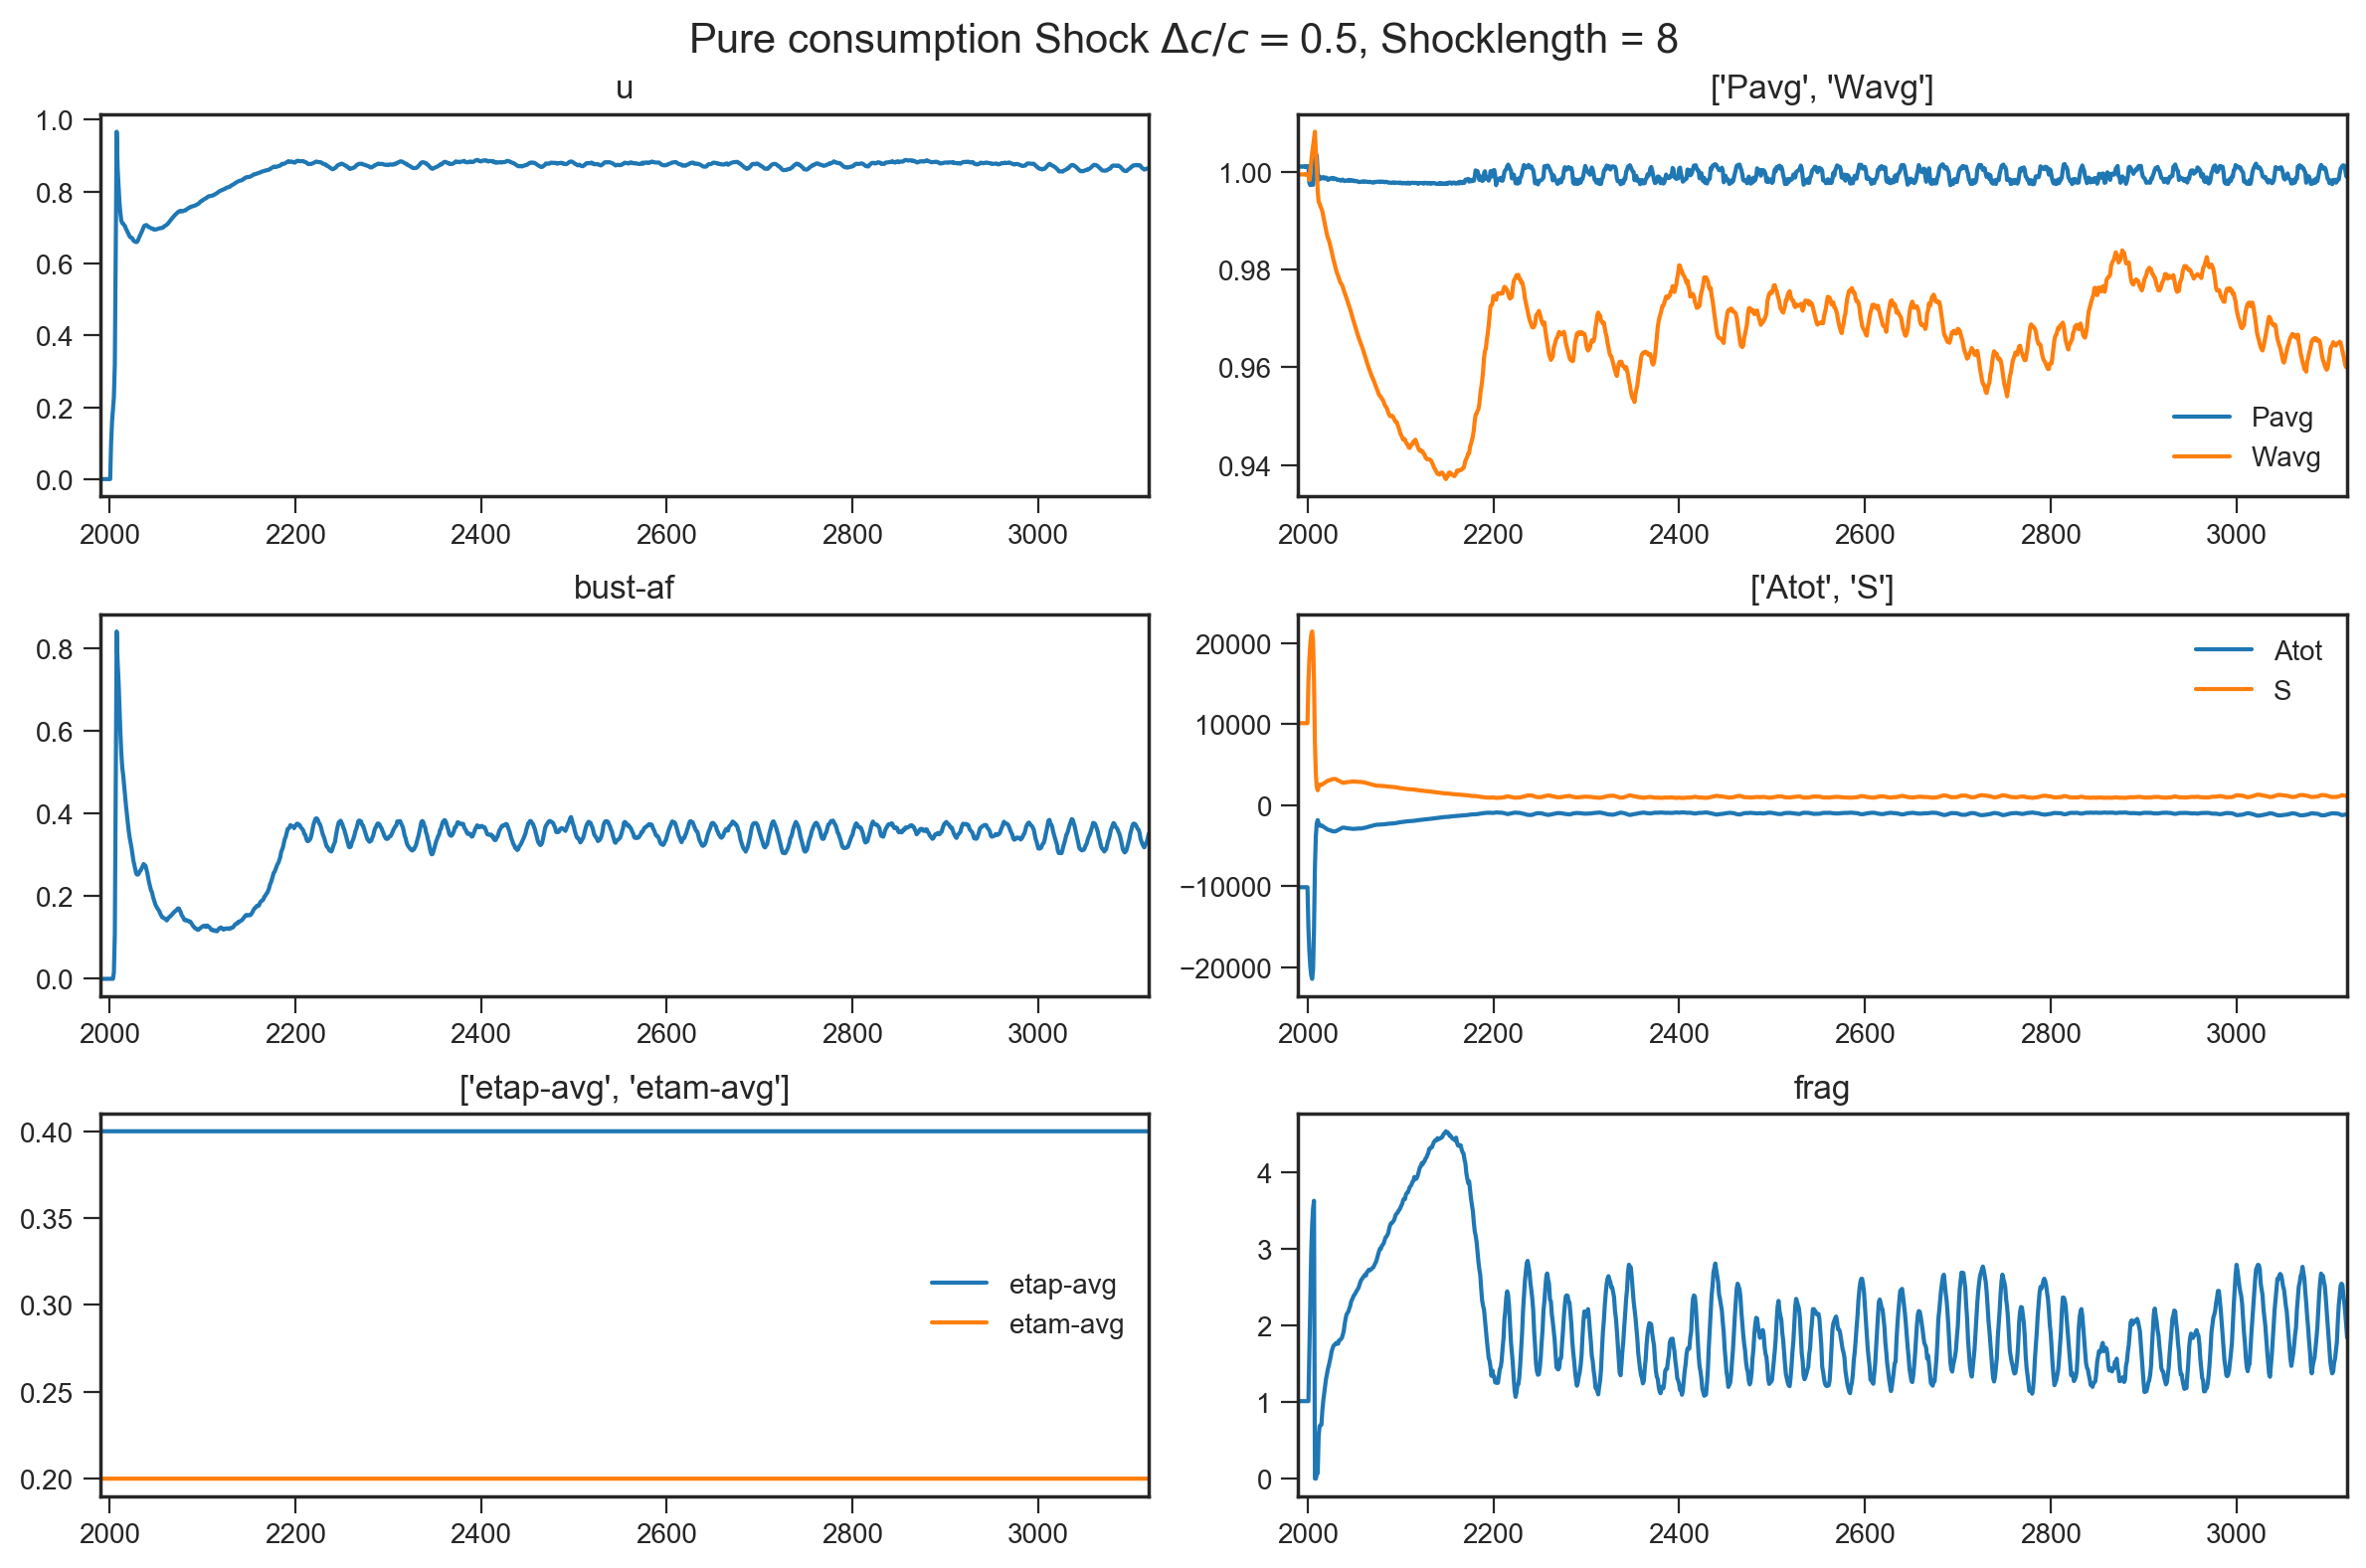

In [13]:
plt.clf()
p = t_plot(res, fd=1990, td=3120,title = 'Pure consumption Shock $\Delta c/c = ${}, Shocklength = {}'.format(0.5,8))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)

## Consumption shock (with Helicopter drop)

##### Helicopter Drop happens at end of shock 

In [14]:
shockflag = 1
factor=0.5
param_names = ['shockflag','factor', 'ptol','t_end', 'policy_start', 'policy_end', 'helico']
param_values = [shockflag,  factor, 1., 2008, 2000, 2010, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]


Single crisis. Length =   65


<Figure size 432x288 with 0 Axes>

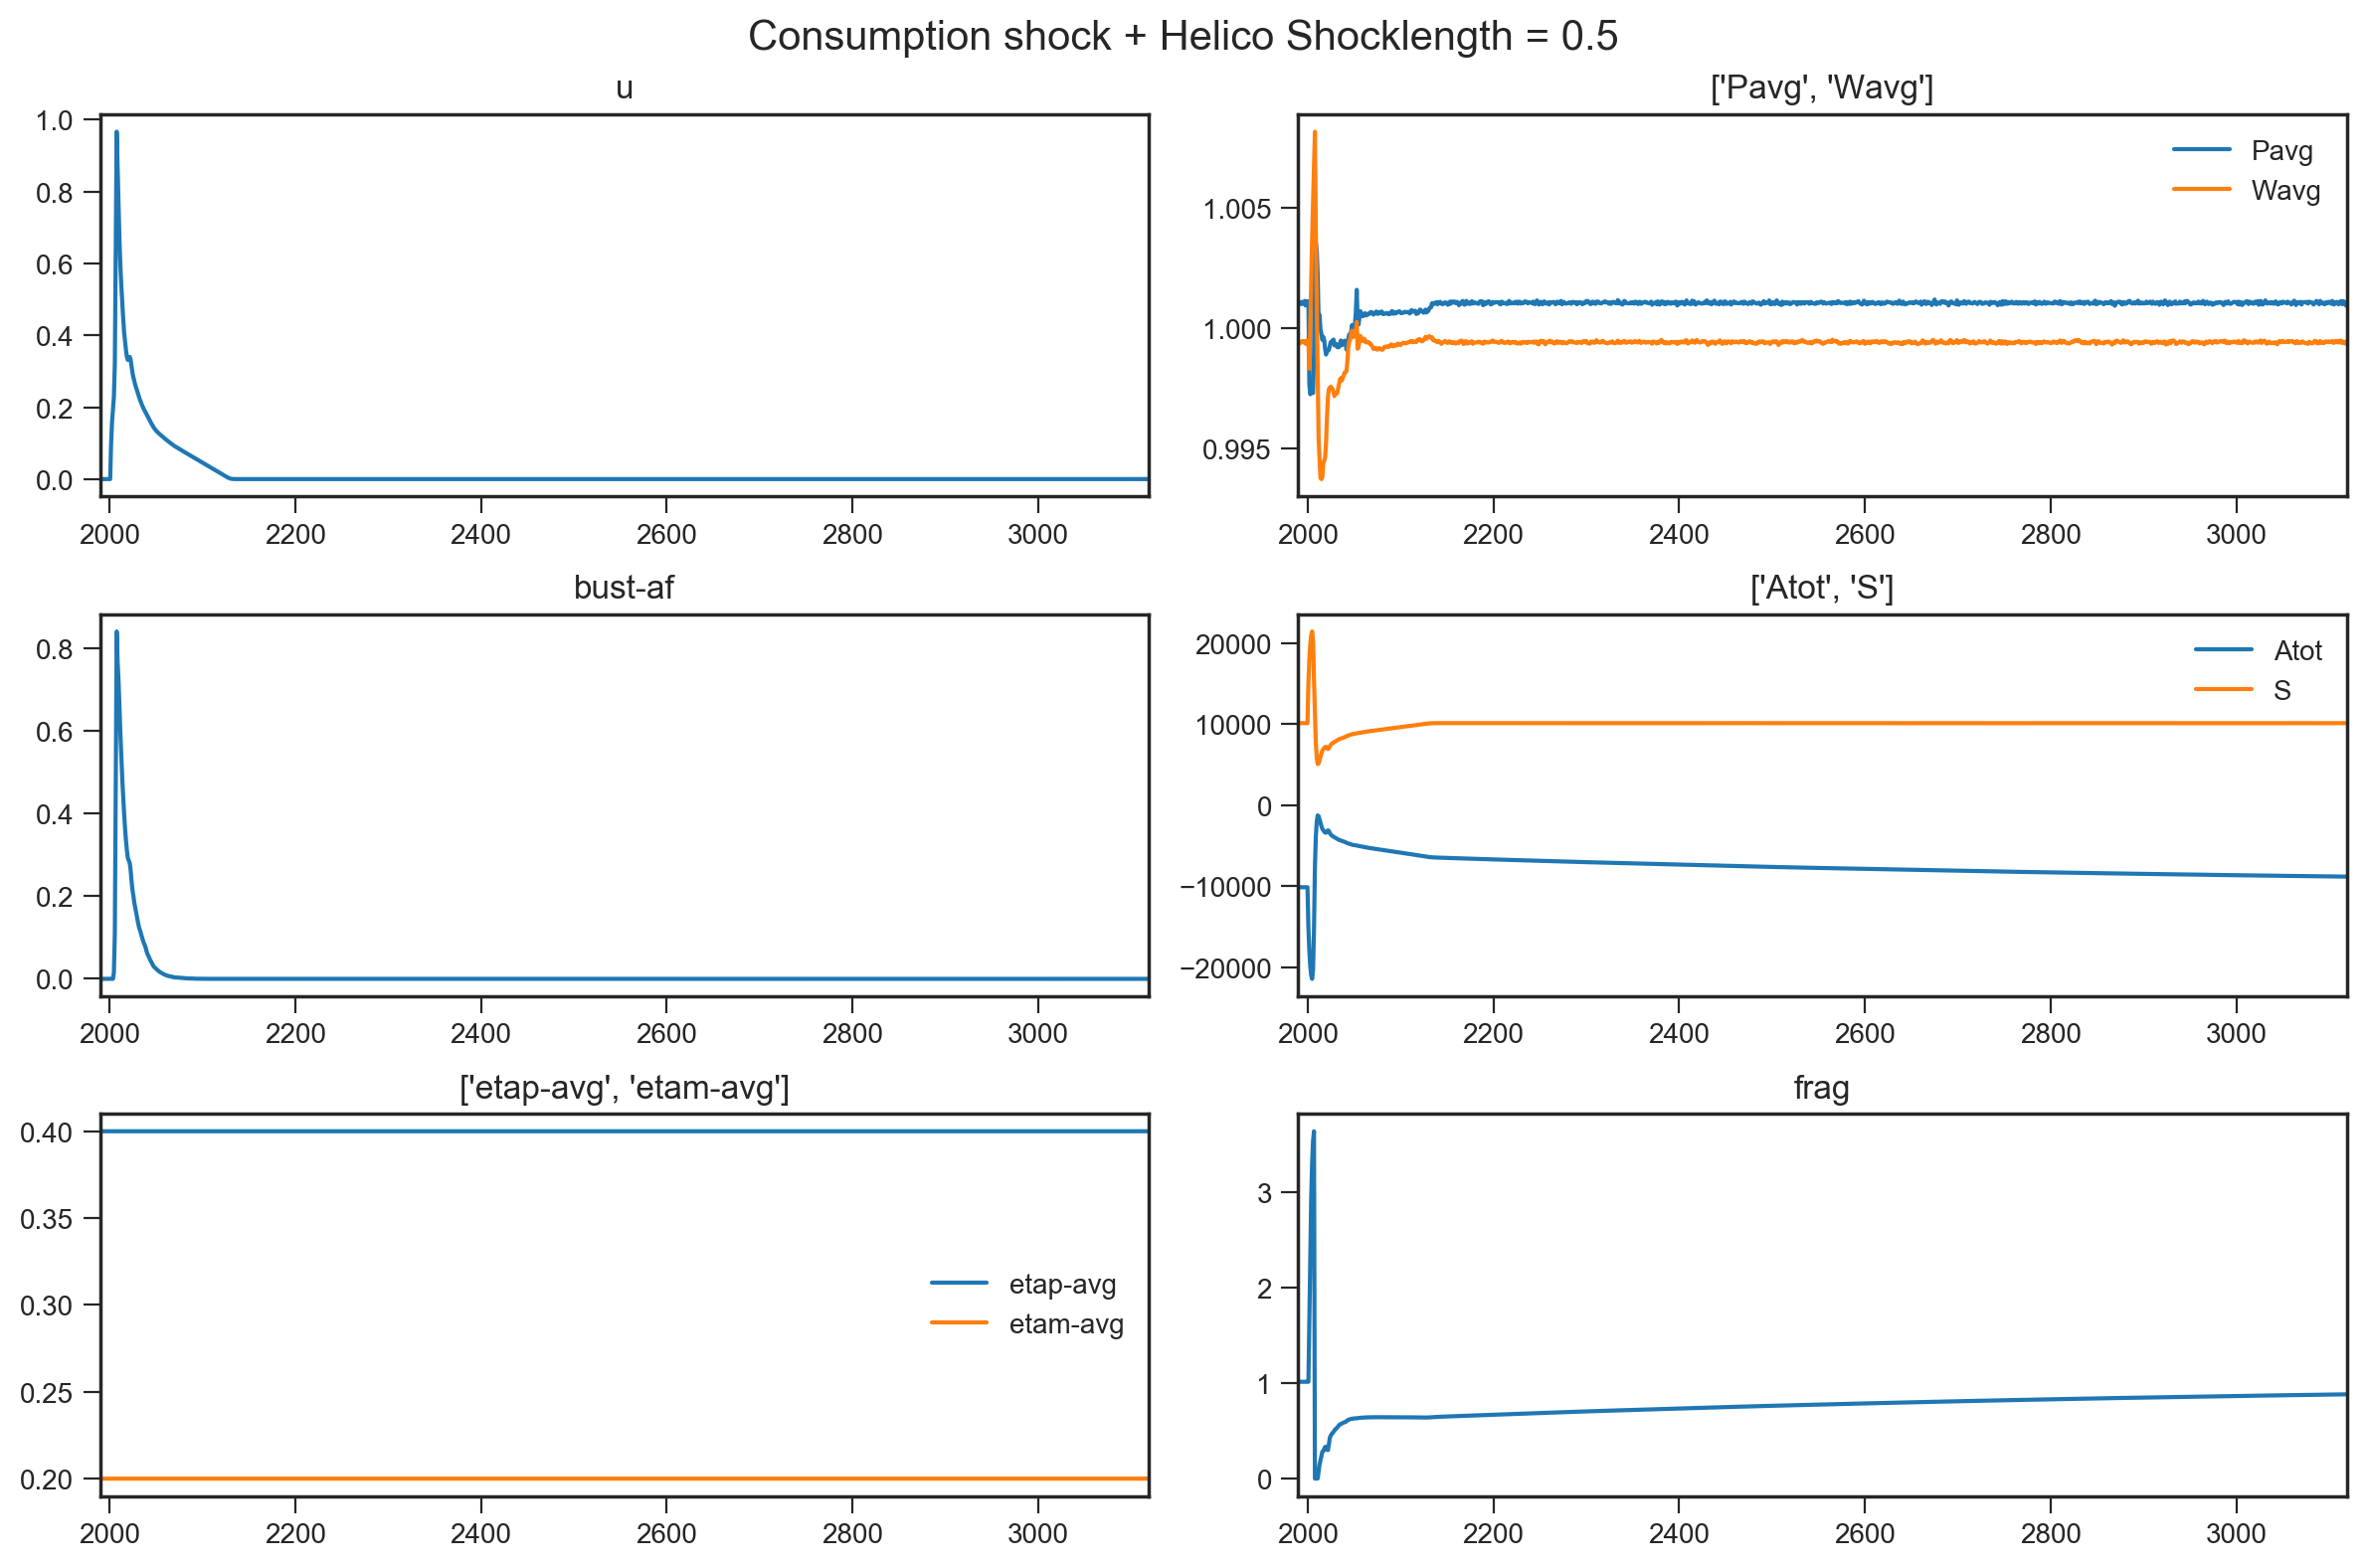

In [15]:
plt.clf()
p = t_plot(res, fd=1990, td=3120,title = 'Consumption shock + Helico Shocklength = {}'.format(factor,8))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)

## Consumption Shock with Naive Policy (No Helicopter Money)

In [17]:
shockflag = 4
factor=0.5
param_names = ['shockflag','factor', 'ptol','t_end', 'policy_start', 'policy_end', 'gpolicy', 'adapt']
param_values = [shockflag,  factor, 1., 2008, 2000, 2008, 0, 0]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   9


<Figure size 432x288 with 0 Axes>

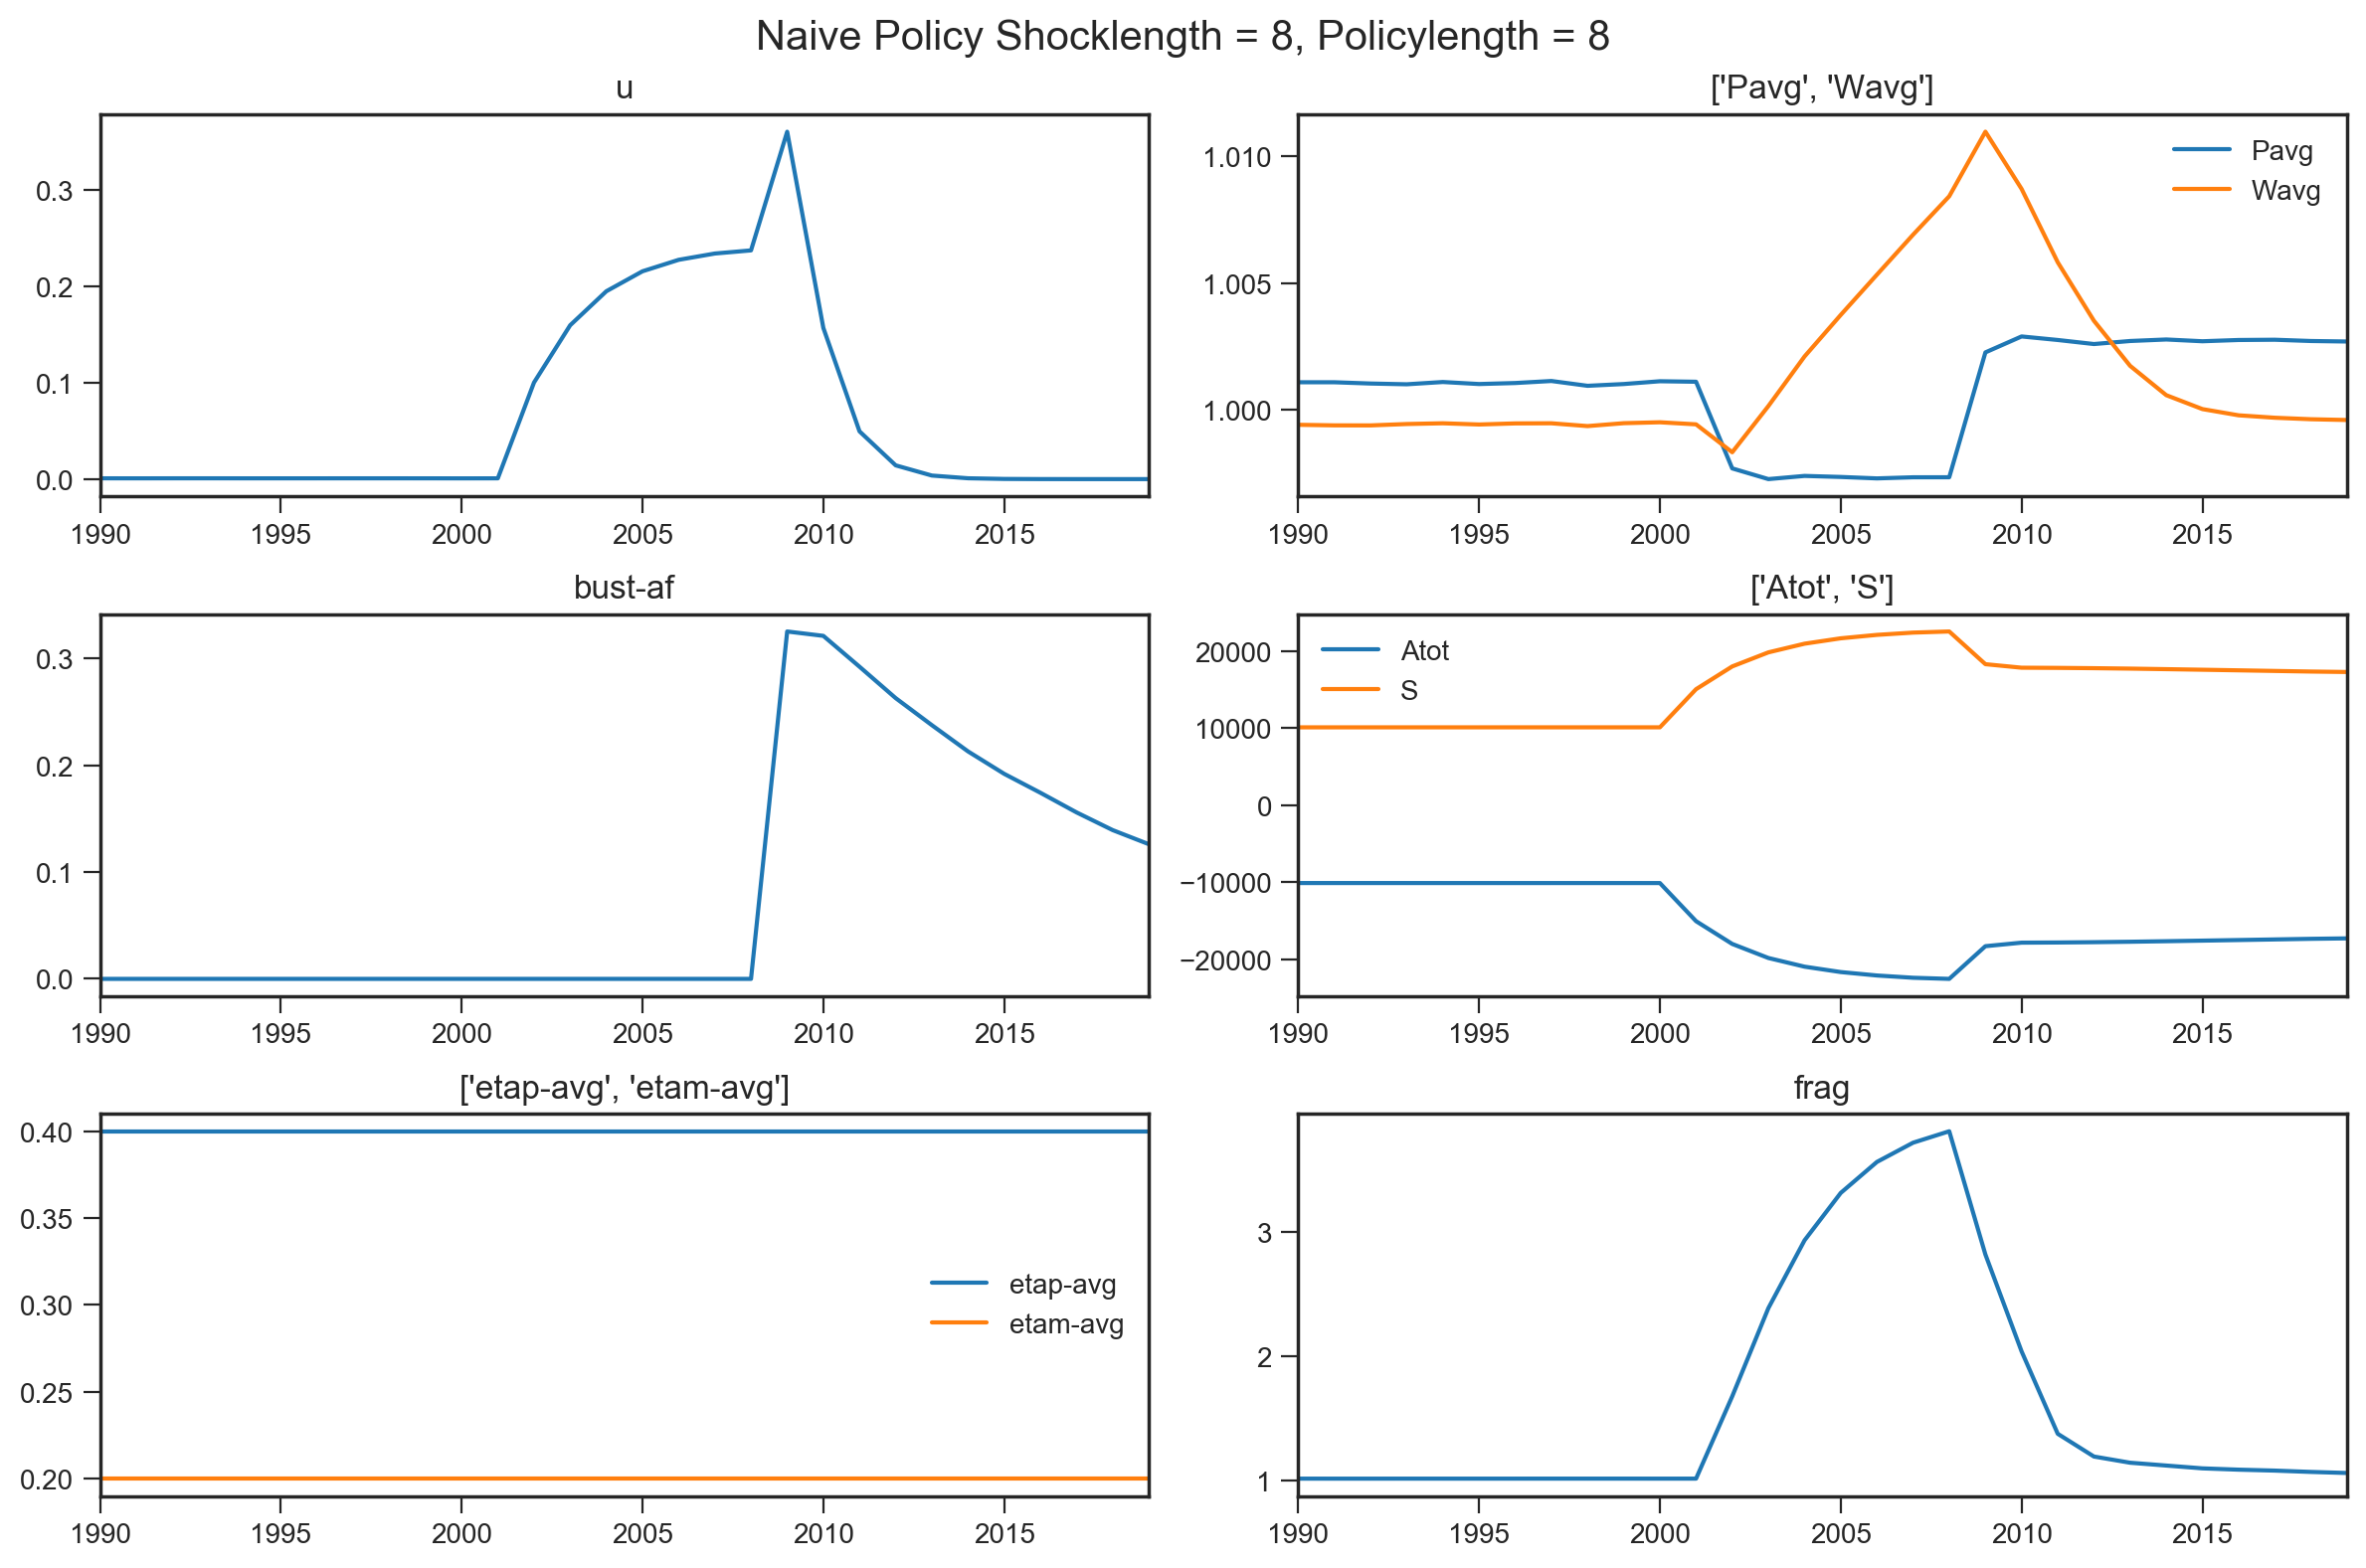

In [19]:
plt.clf()
p = t_plot(res, fd=1990, td=2020,title = 'Naive Policy Shocklength = {}, Policylength = {}'.format(8,8))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)

In [20]:
shockflag = 4
param_names = ['shockflag','factor', 'ptol','t_end', 'policy_start', 'policy_end', 'gpolicy', 'adapt']
param_values = [shockflag,  factor, 1., 2008, 2000, 2010, 0, 0]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7


<Figure size 432x288 with 0 Axes>

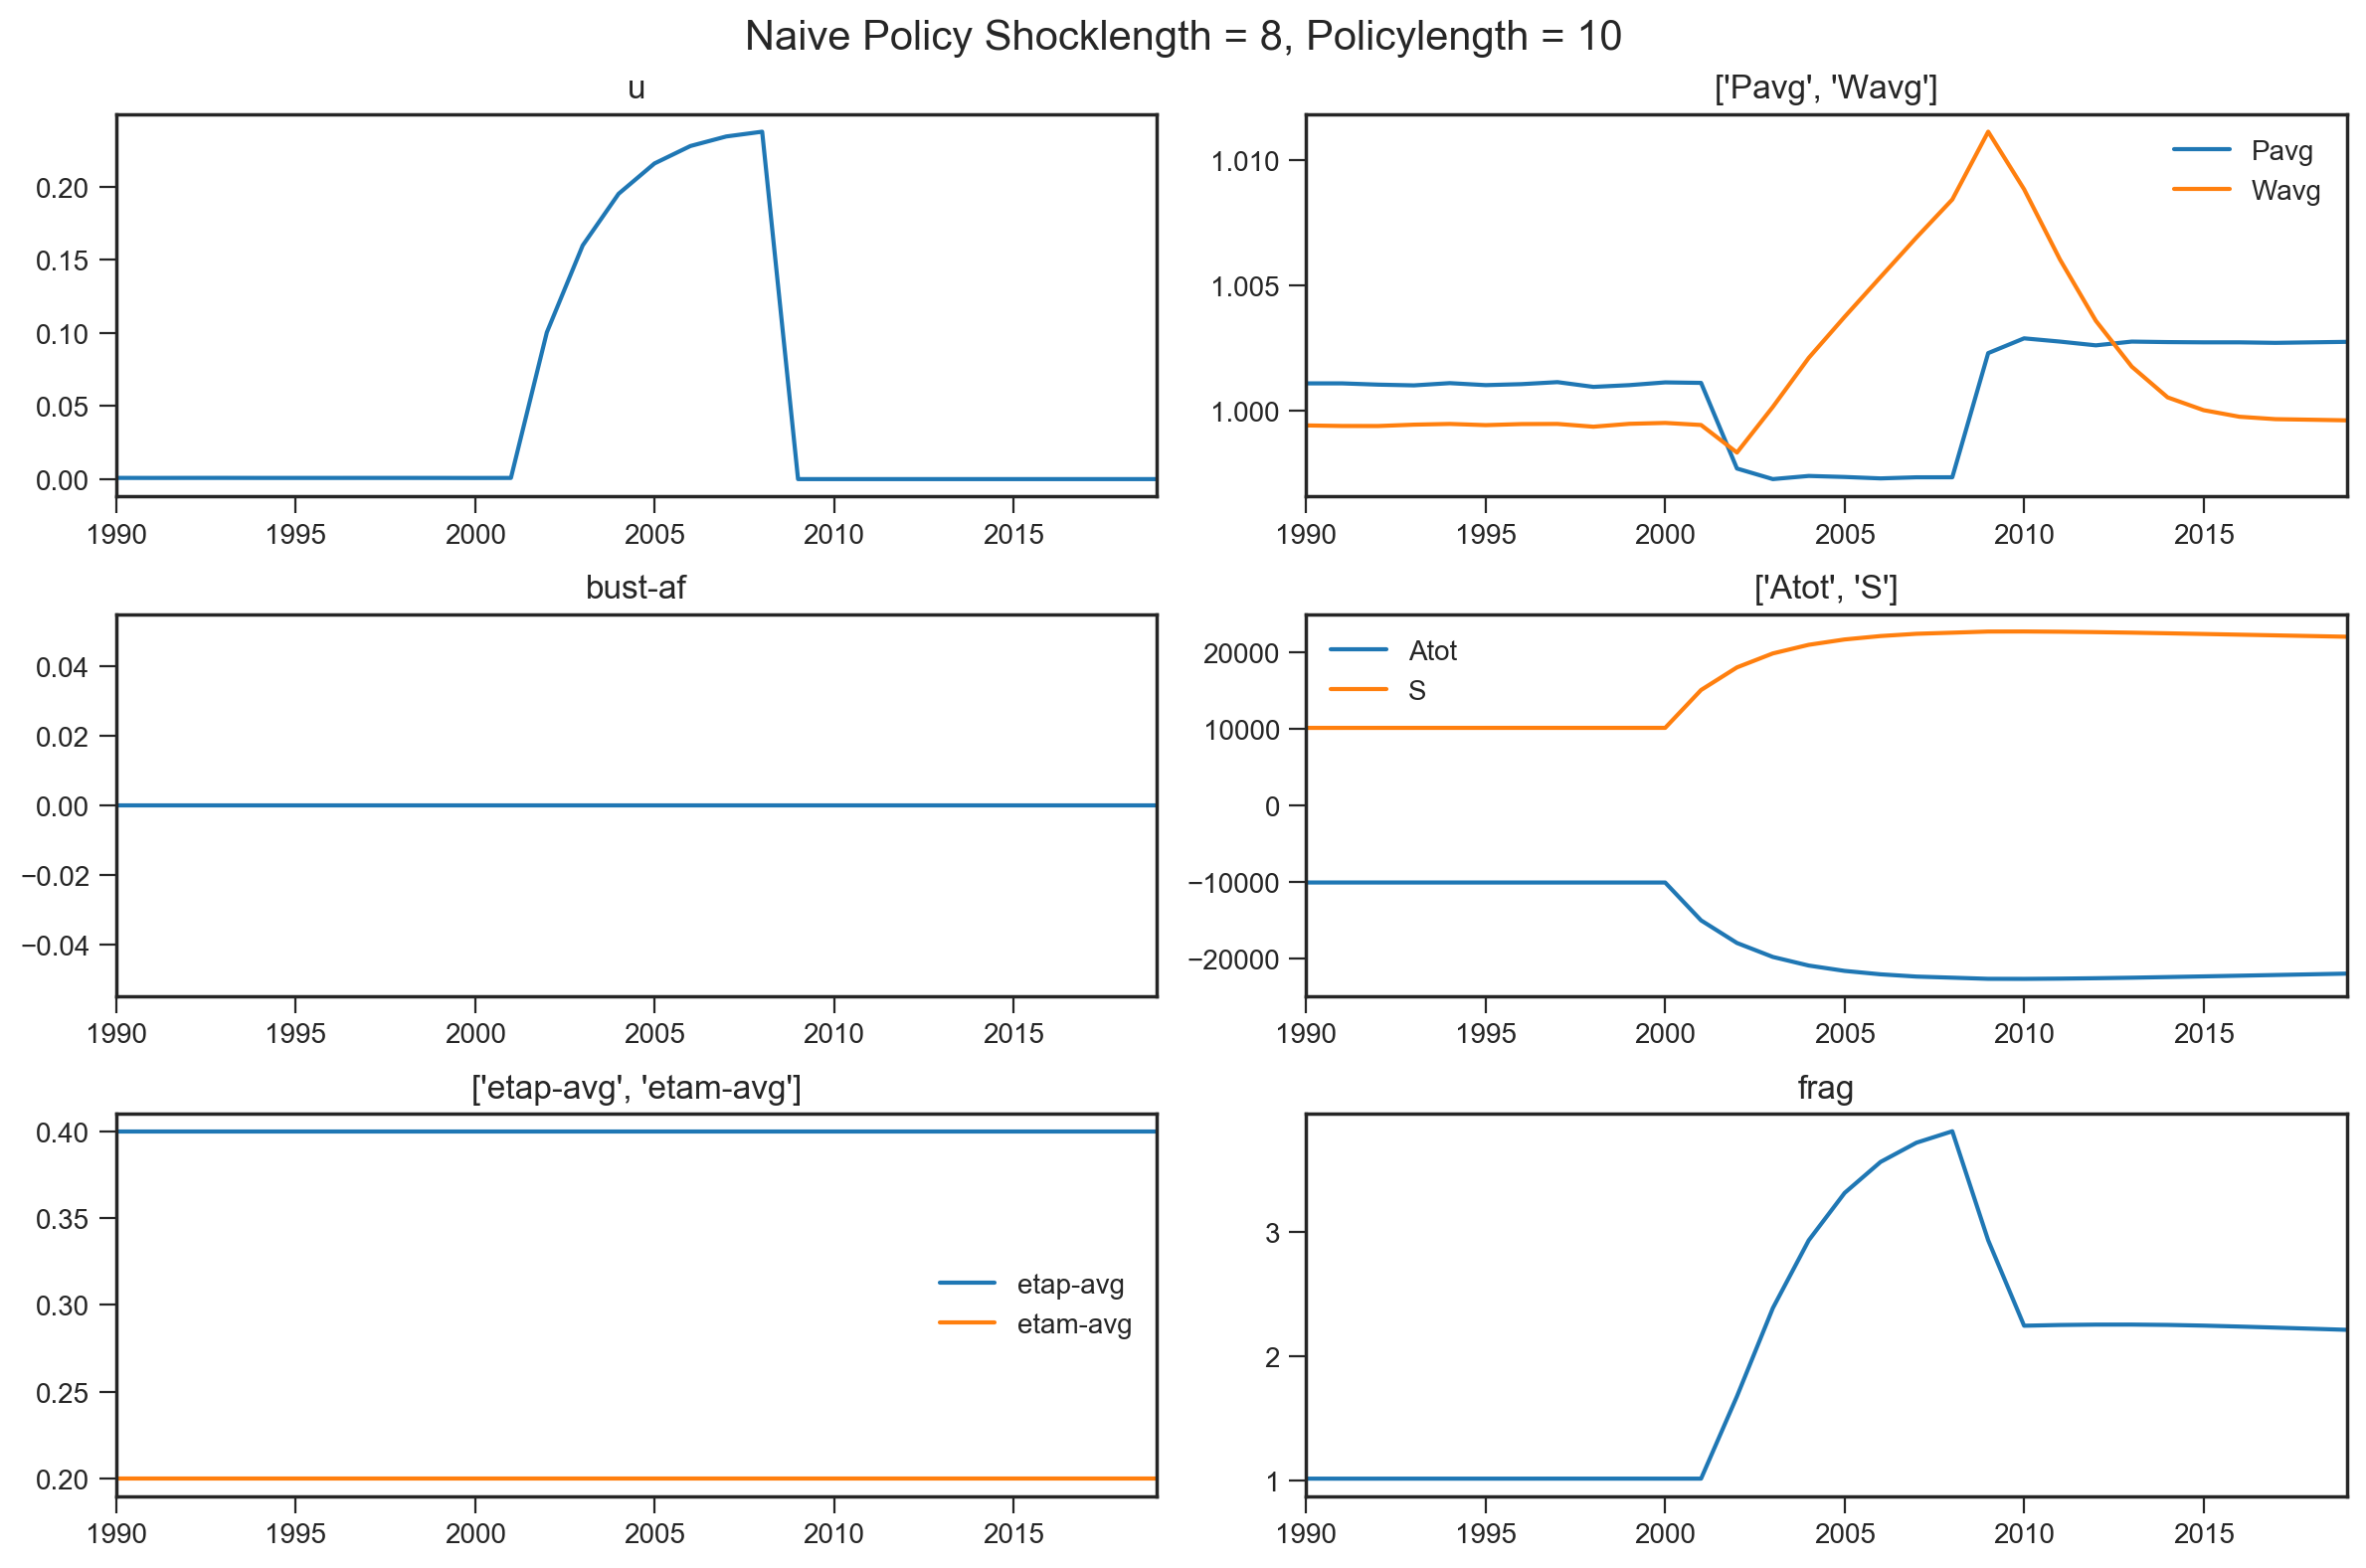

In [22]:
plt.clf()
p = t_plot(res, fd=1990, td=2020,title = 'Naive Policy Shocklength = {}, Policylength = {}'.format(8,10))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)

## Consumption Shock with Naive Policy +  Helicopter Money

##### Helicopter Drop happens at end of shock 

In [24]:
shockflag = 4
param_names = ['shockflag','factor', 'ptol','t_end', 'policy_start', 'policy_end', 'helico']
param_values = [shockflag,  factor, 1., 2008, 2000, 2010, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7


<Figure size 432x288 with 0 Axes>

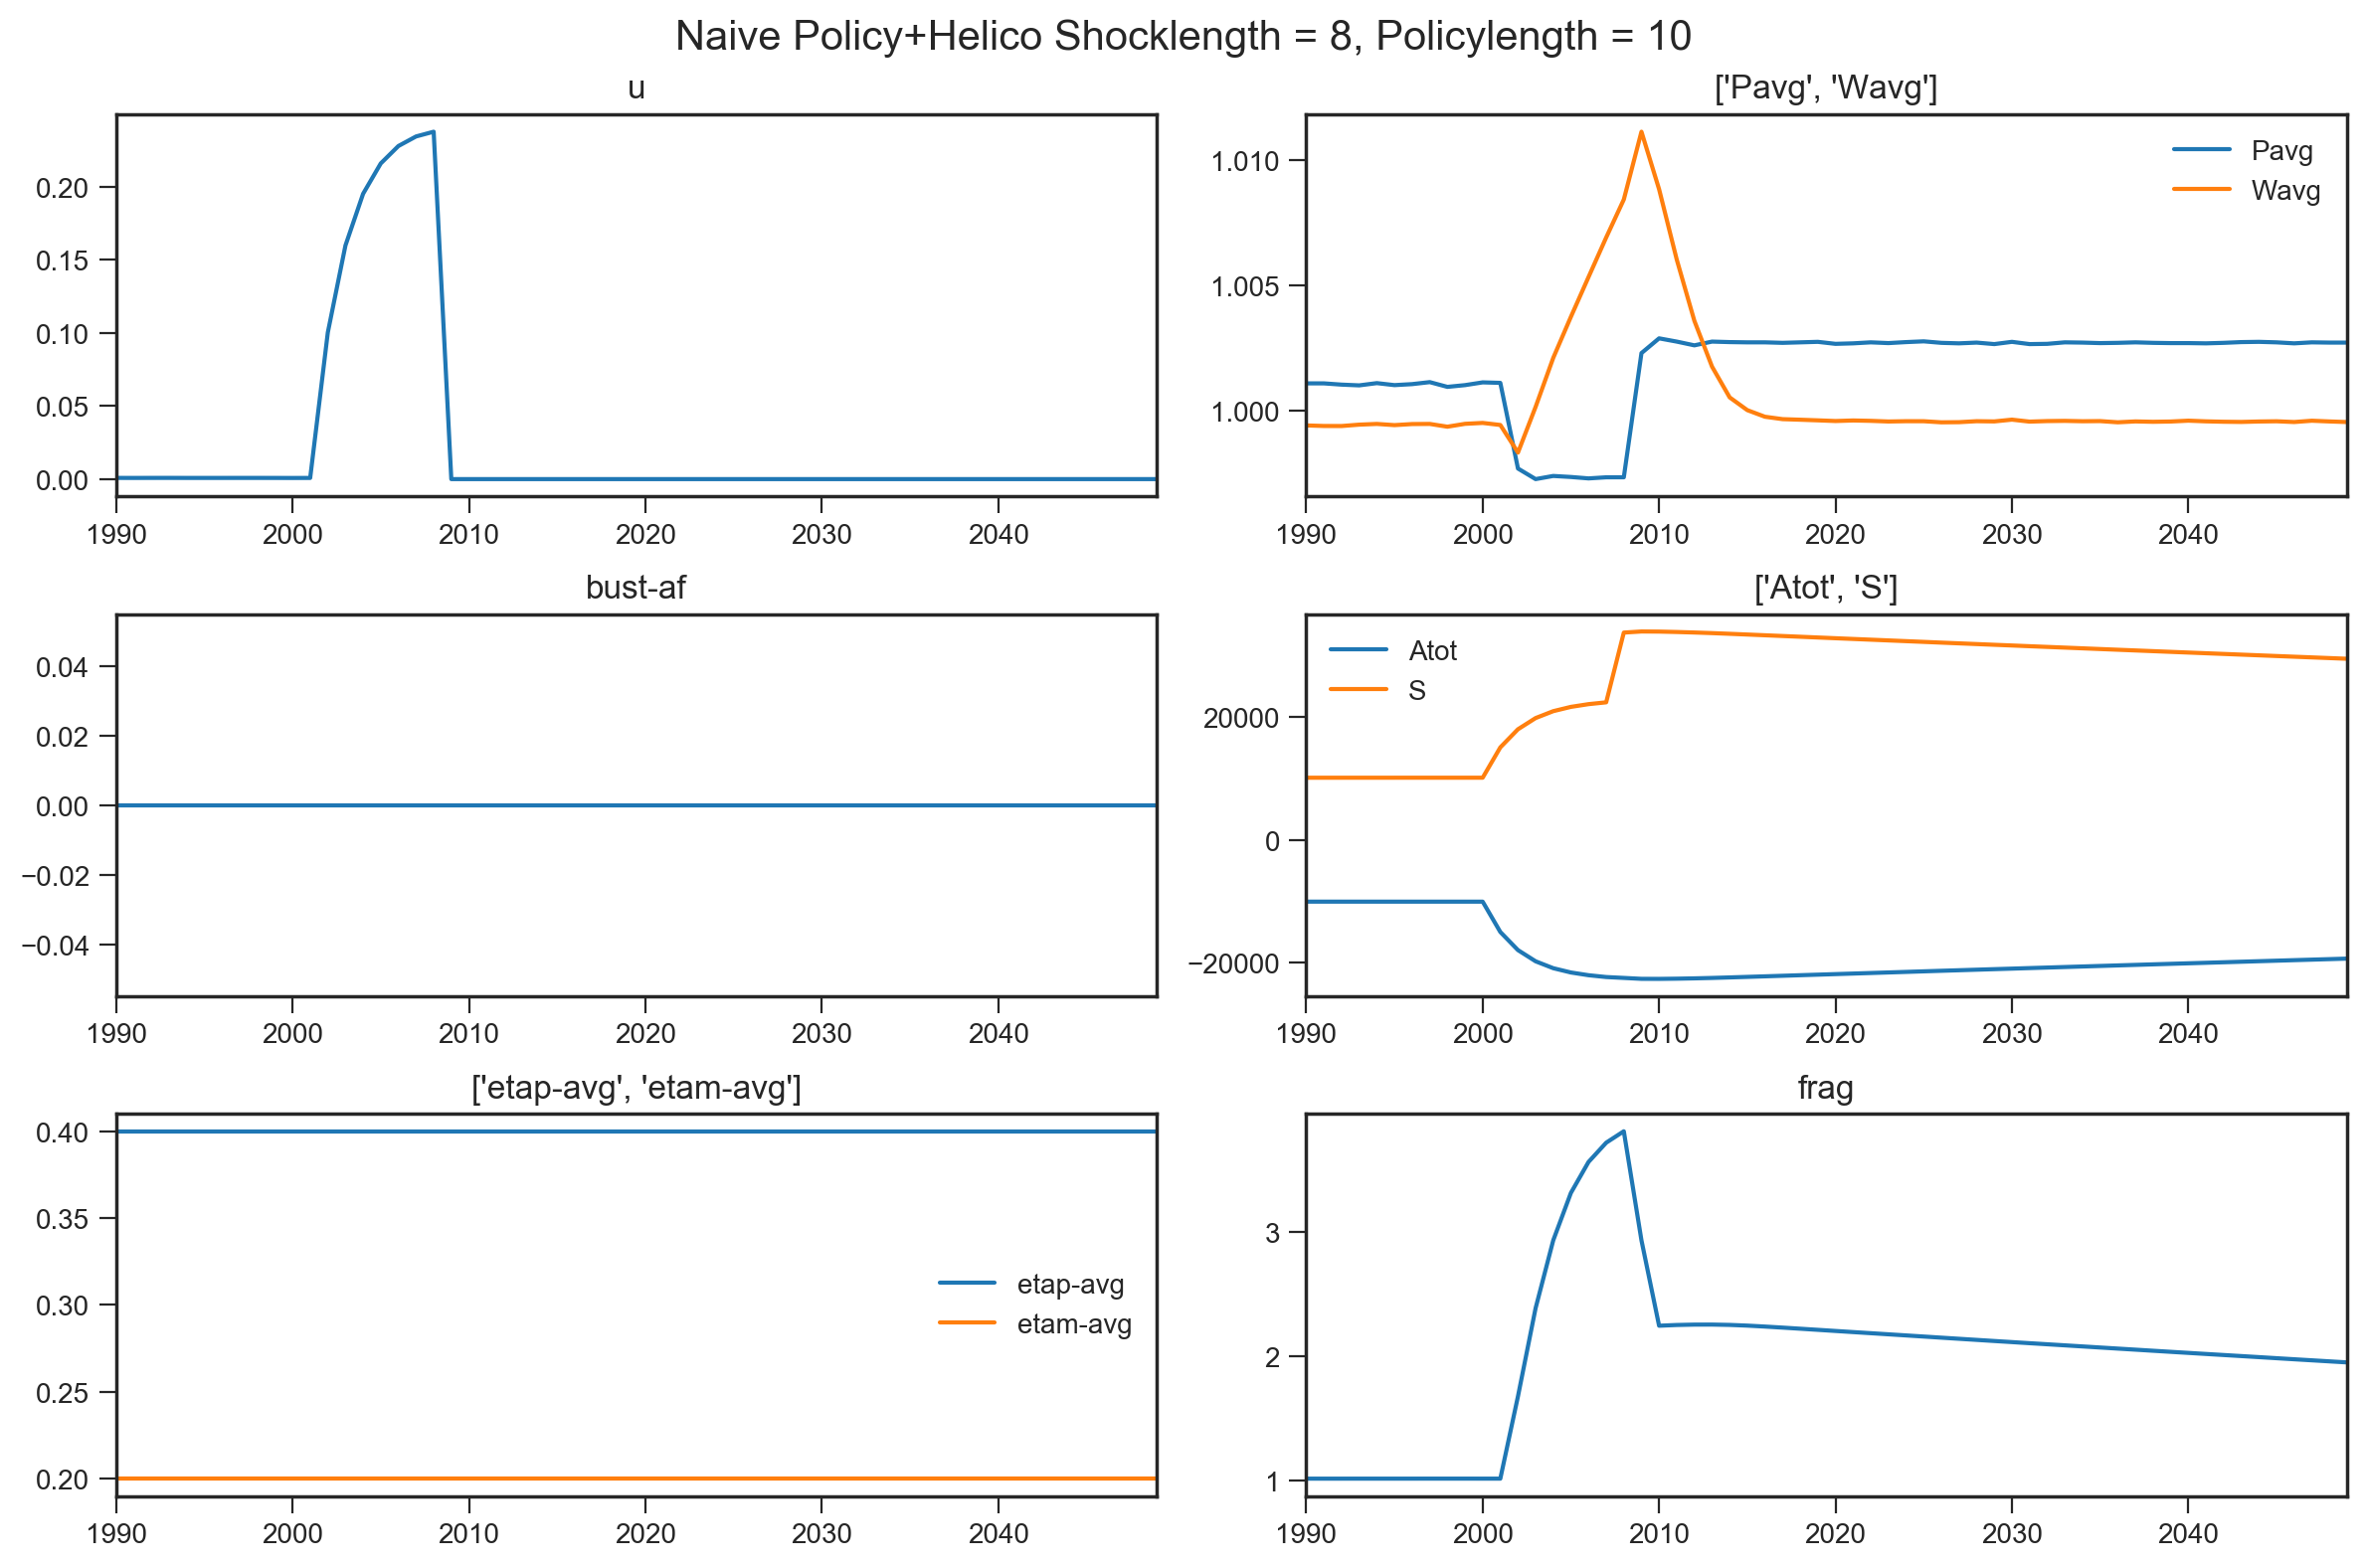

In [25]:
plt.clf()
p = t_plot(res, fd=1990, td=2050,title = 'Naive Policy+Helico Shocklength = {}, Policylength = {}'.format(8,10))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)

In [28]:
shockflag = 4
param_names = ['shockflag','factor', 'ptol','t_end', 'policy_start', 'policy_end', 'helico']
param_values = [shockflag,  factor, 1., 2008, 2000, 2012, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7


<Figure size 432x288 with 0 Axes>

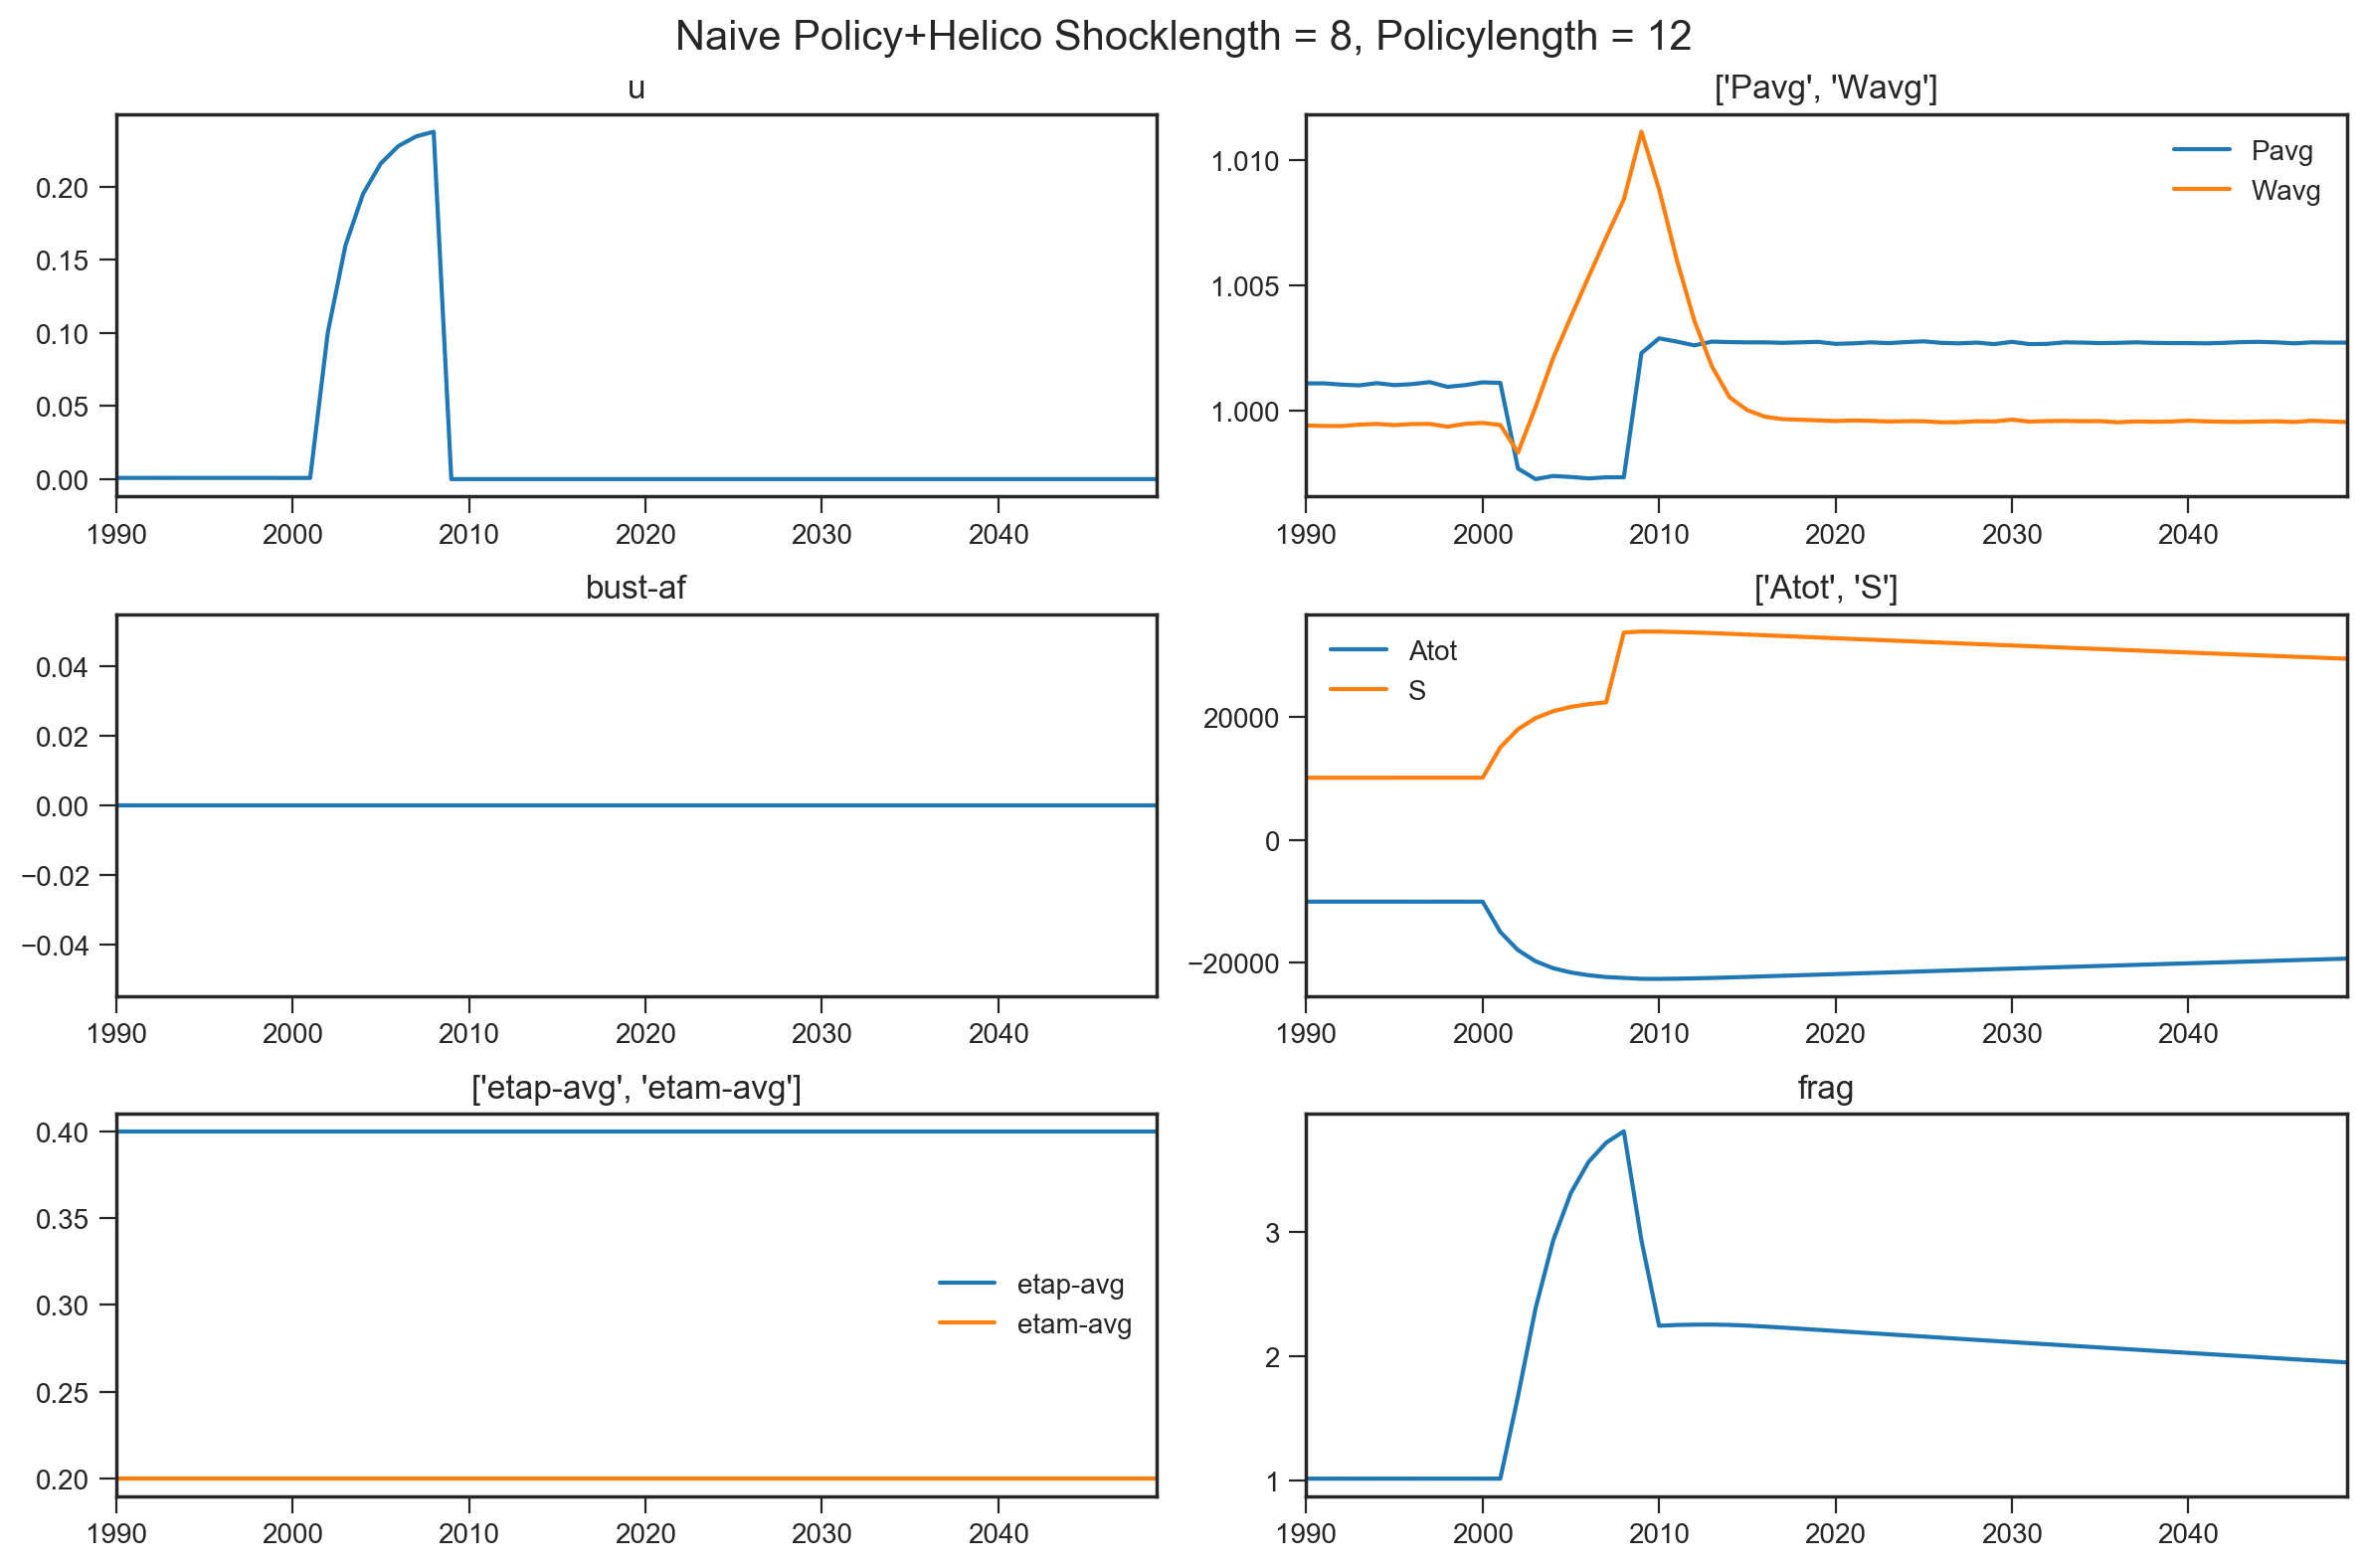

In [29]:
plt.clf()
p = t_plot(res, fd=1990, td=2050,title = 'Naive Policy+Helico Shocklength = {}, Policylength = {}'.format(8,12))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)

## Consumption Shock + Smart policy. 

We have three versions of the policy. 

1. We set $\Theta = \langle \Phi \rangle + \textrm{tol}$ for a certain number of steps. $\textrm{tol}$ is set to 1 in what follows. This policy is run for a fixed number of steps which defines the policy length

2. Adaptive policy: we set $\Theta = \langle \Phi \rangle + \textrm{tol}$ as long as the average fragility of the firms is greater than $\Theta_0 = 3$ (which is the baseline debt level)

3. Finally we have an adaptive policy where we keep the policy on till $\langle \Phi \rangle \geq 2$ (i.e. $\Theta_0 -1$).

In [33]:
shockflag = 4
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','ptol', 'gpolicy', 'adapt']
param_values = [shockflag,  factor, 2008, 2000, 2008, 0.0, 1, 0]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   9


<Figure size 432x288 with 0 Axes>

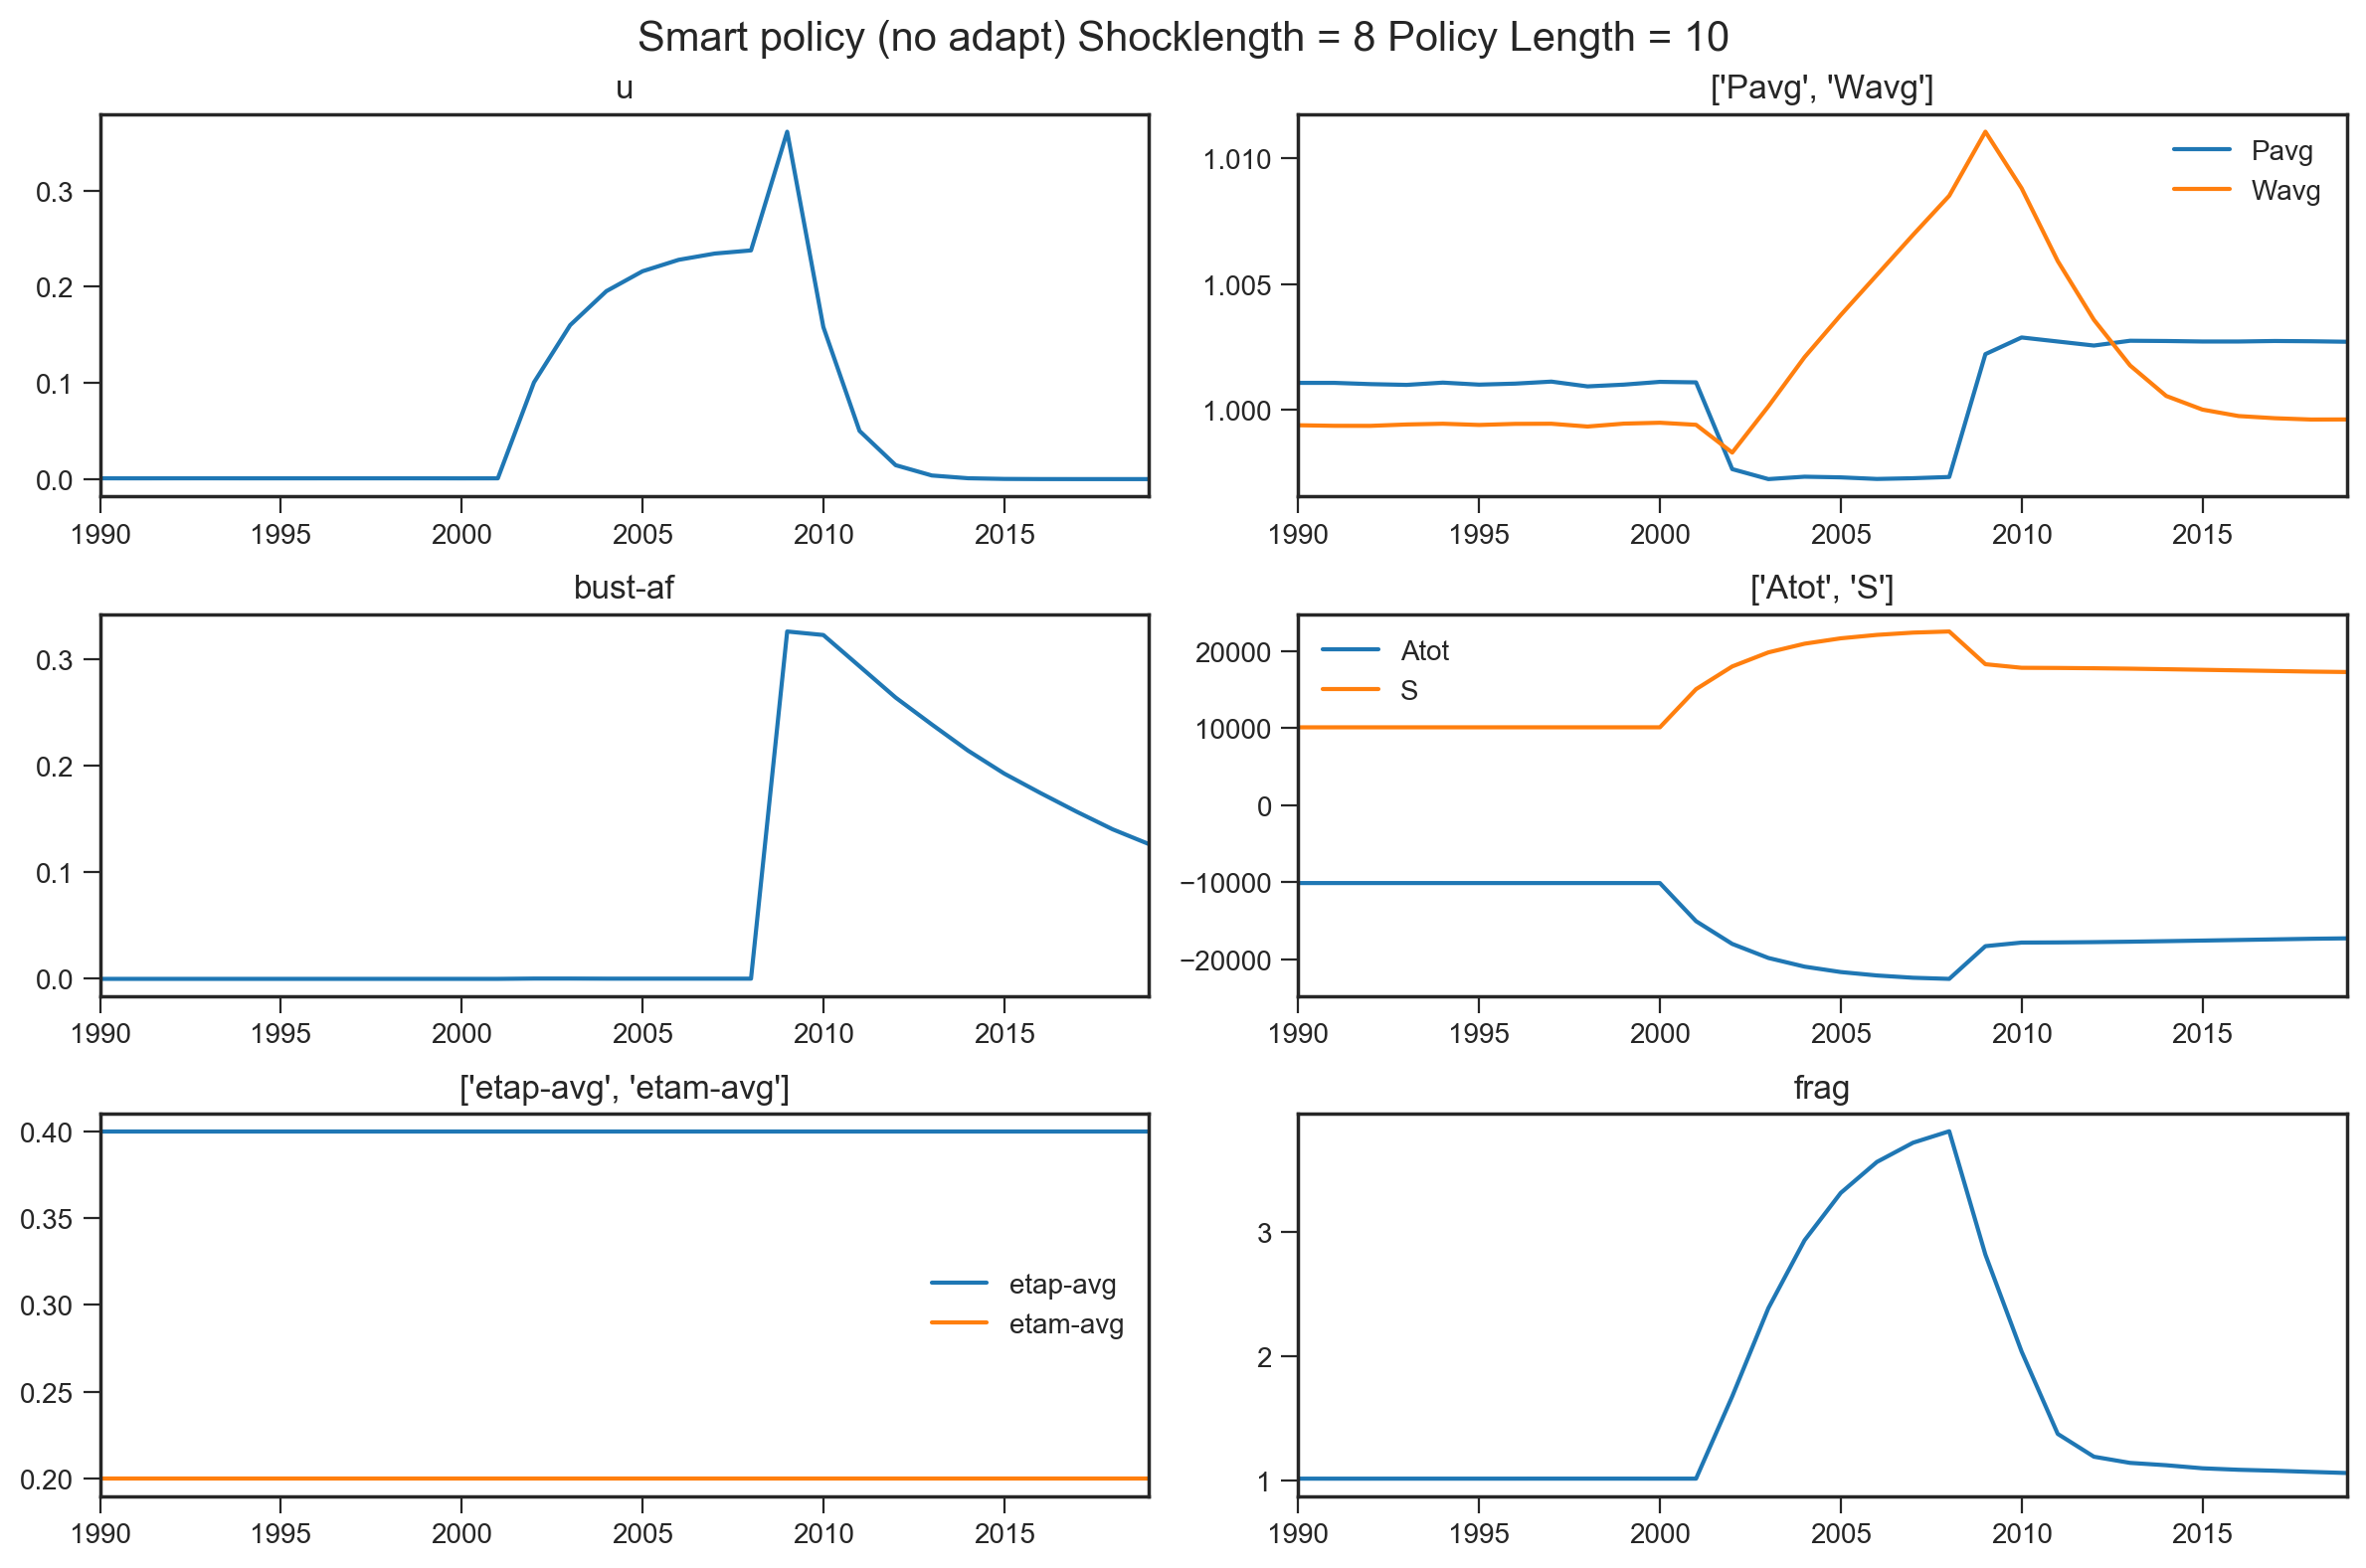

In [34]:
plt.clf()
p = t_plot(res, fd=1990, td=2020,title = 'Smart policy (no adapt) Shocklength = {} Policy Length = {}'.format(8,10))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)

In [35]:
shockflag = 4
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','ptol', 'gpolicy', 'adapt']
param_values = [shockflag,  factor, 2008, 2000, 2012, 0.0, 1, 0]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7


<Figure size 432x288 with 0 Axes>

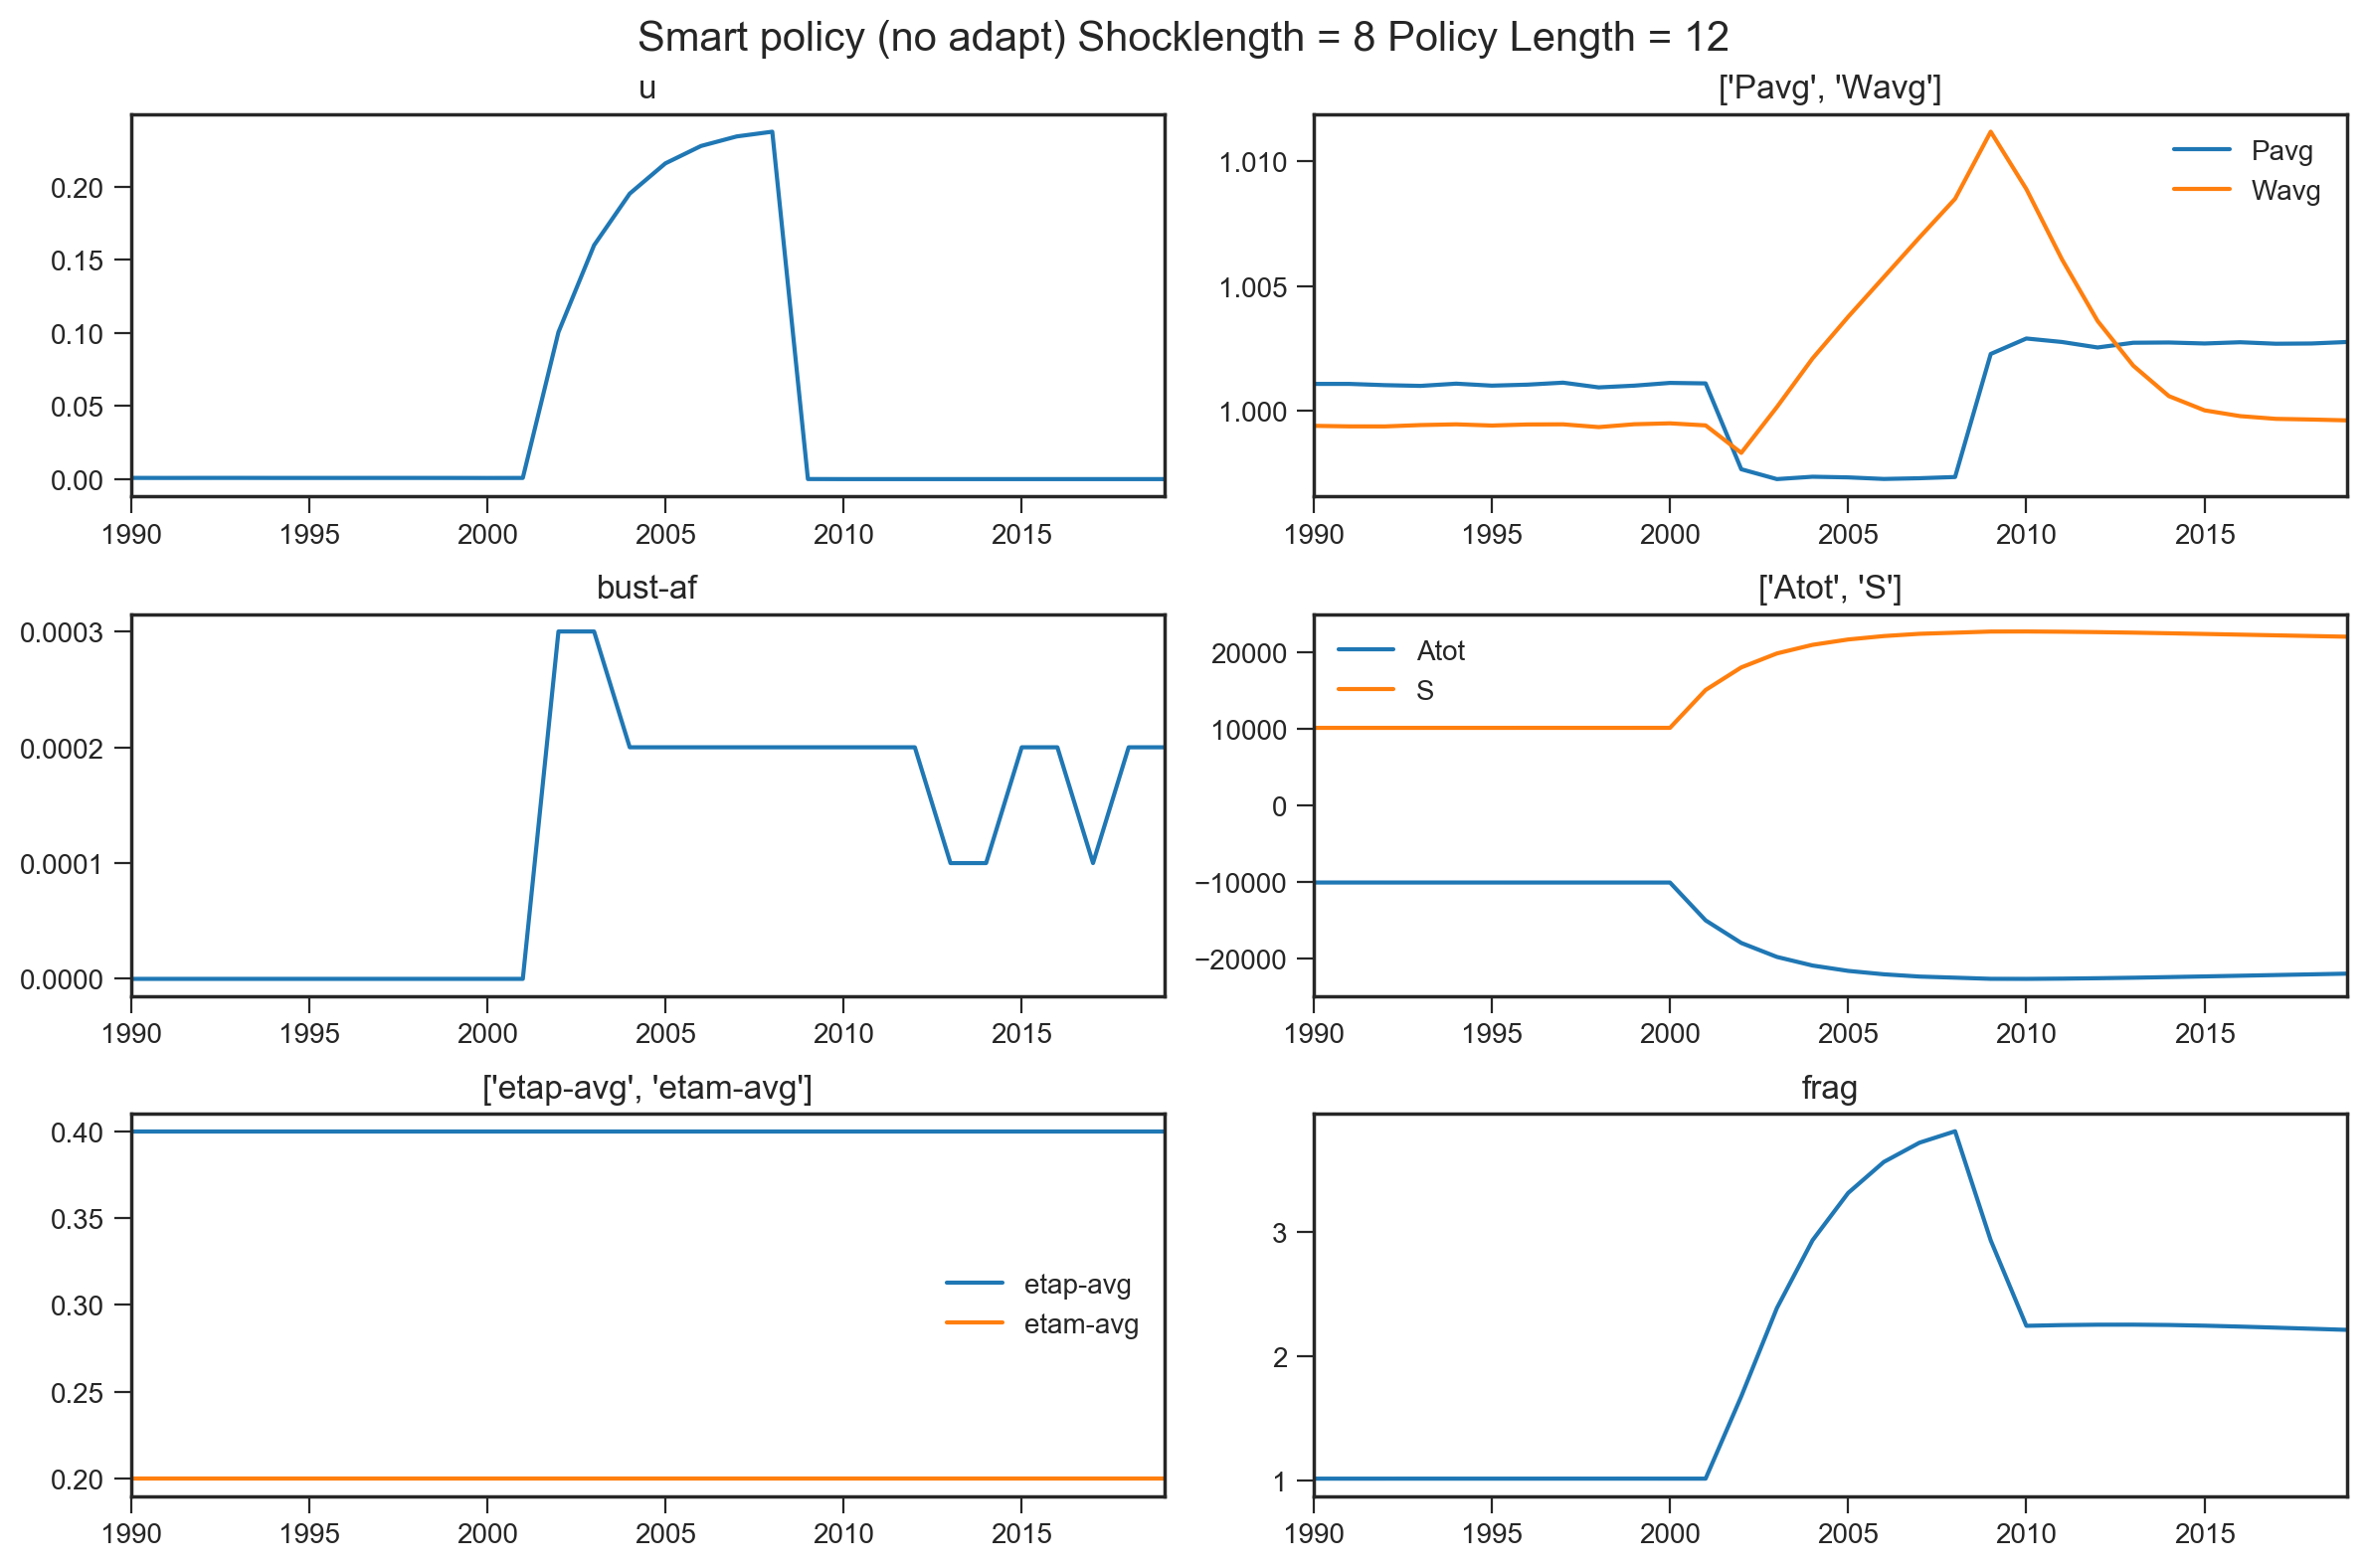

In [37]:
plt.clf()
p = t_plot(res, fd=1990, td=2020,title = 'Smart policy (no adapt) Shocklength = {} Policy Length = {}'.format(8,12))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)

### Now we apply adaptive policies

Here fragility limit is the value of threshold. We stop the policy as soon as $\Theta < \textrm{Fragility limit}$

In [41]:
shockflag = 4
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','ptol', 'gpolicy', 'adapt']
param_values = [shockflag,  factor, 2008, 2000, 2008, 0.0, 1, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7
Adaptive policy ran till = 2009


<Figure size 432x288 with 0 Axes>

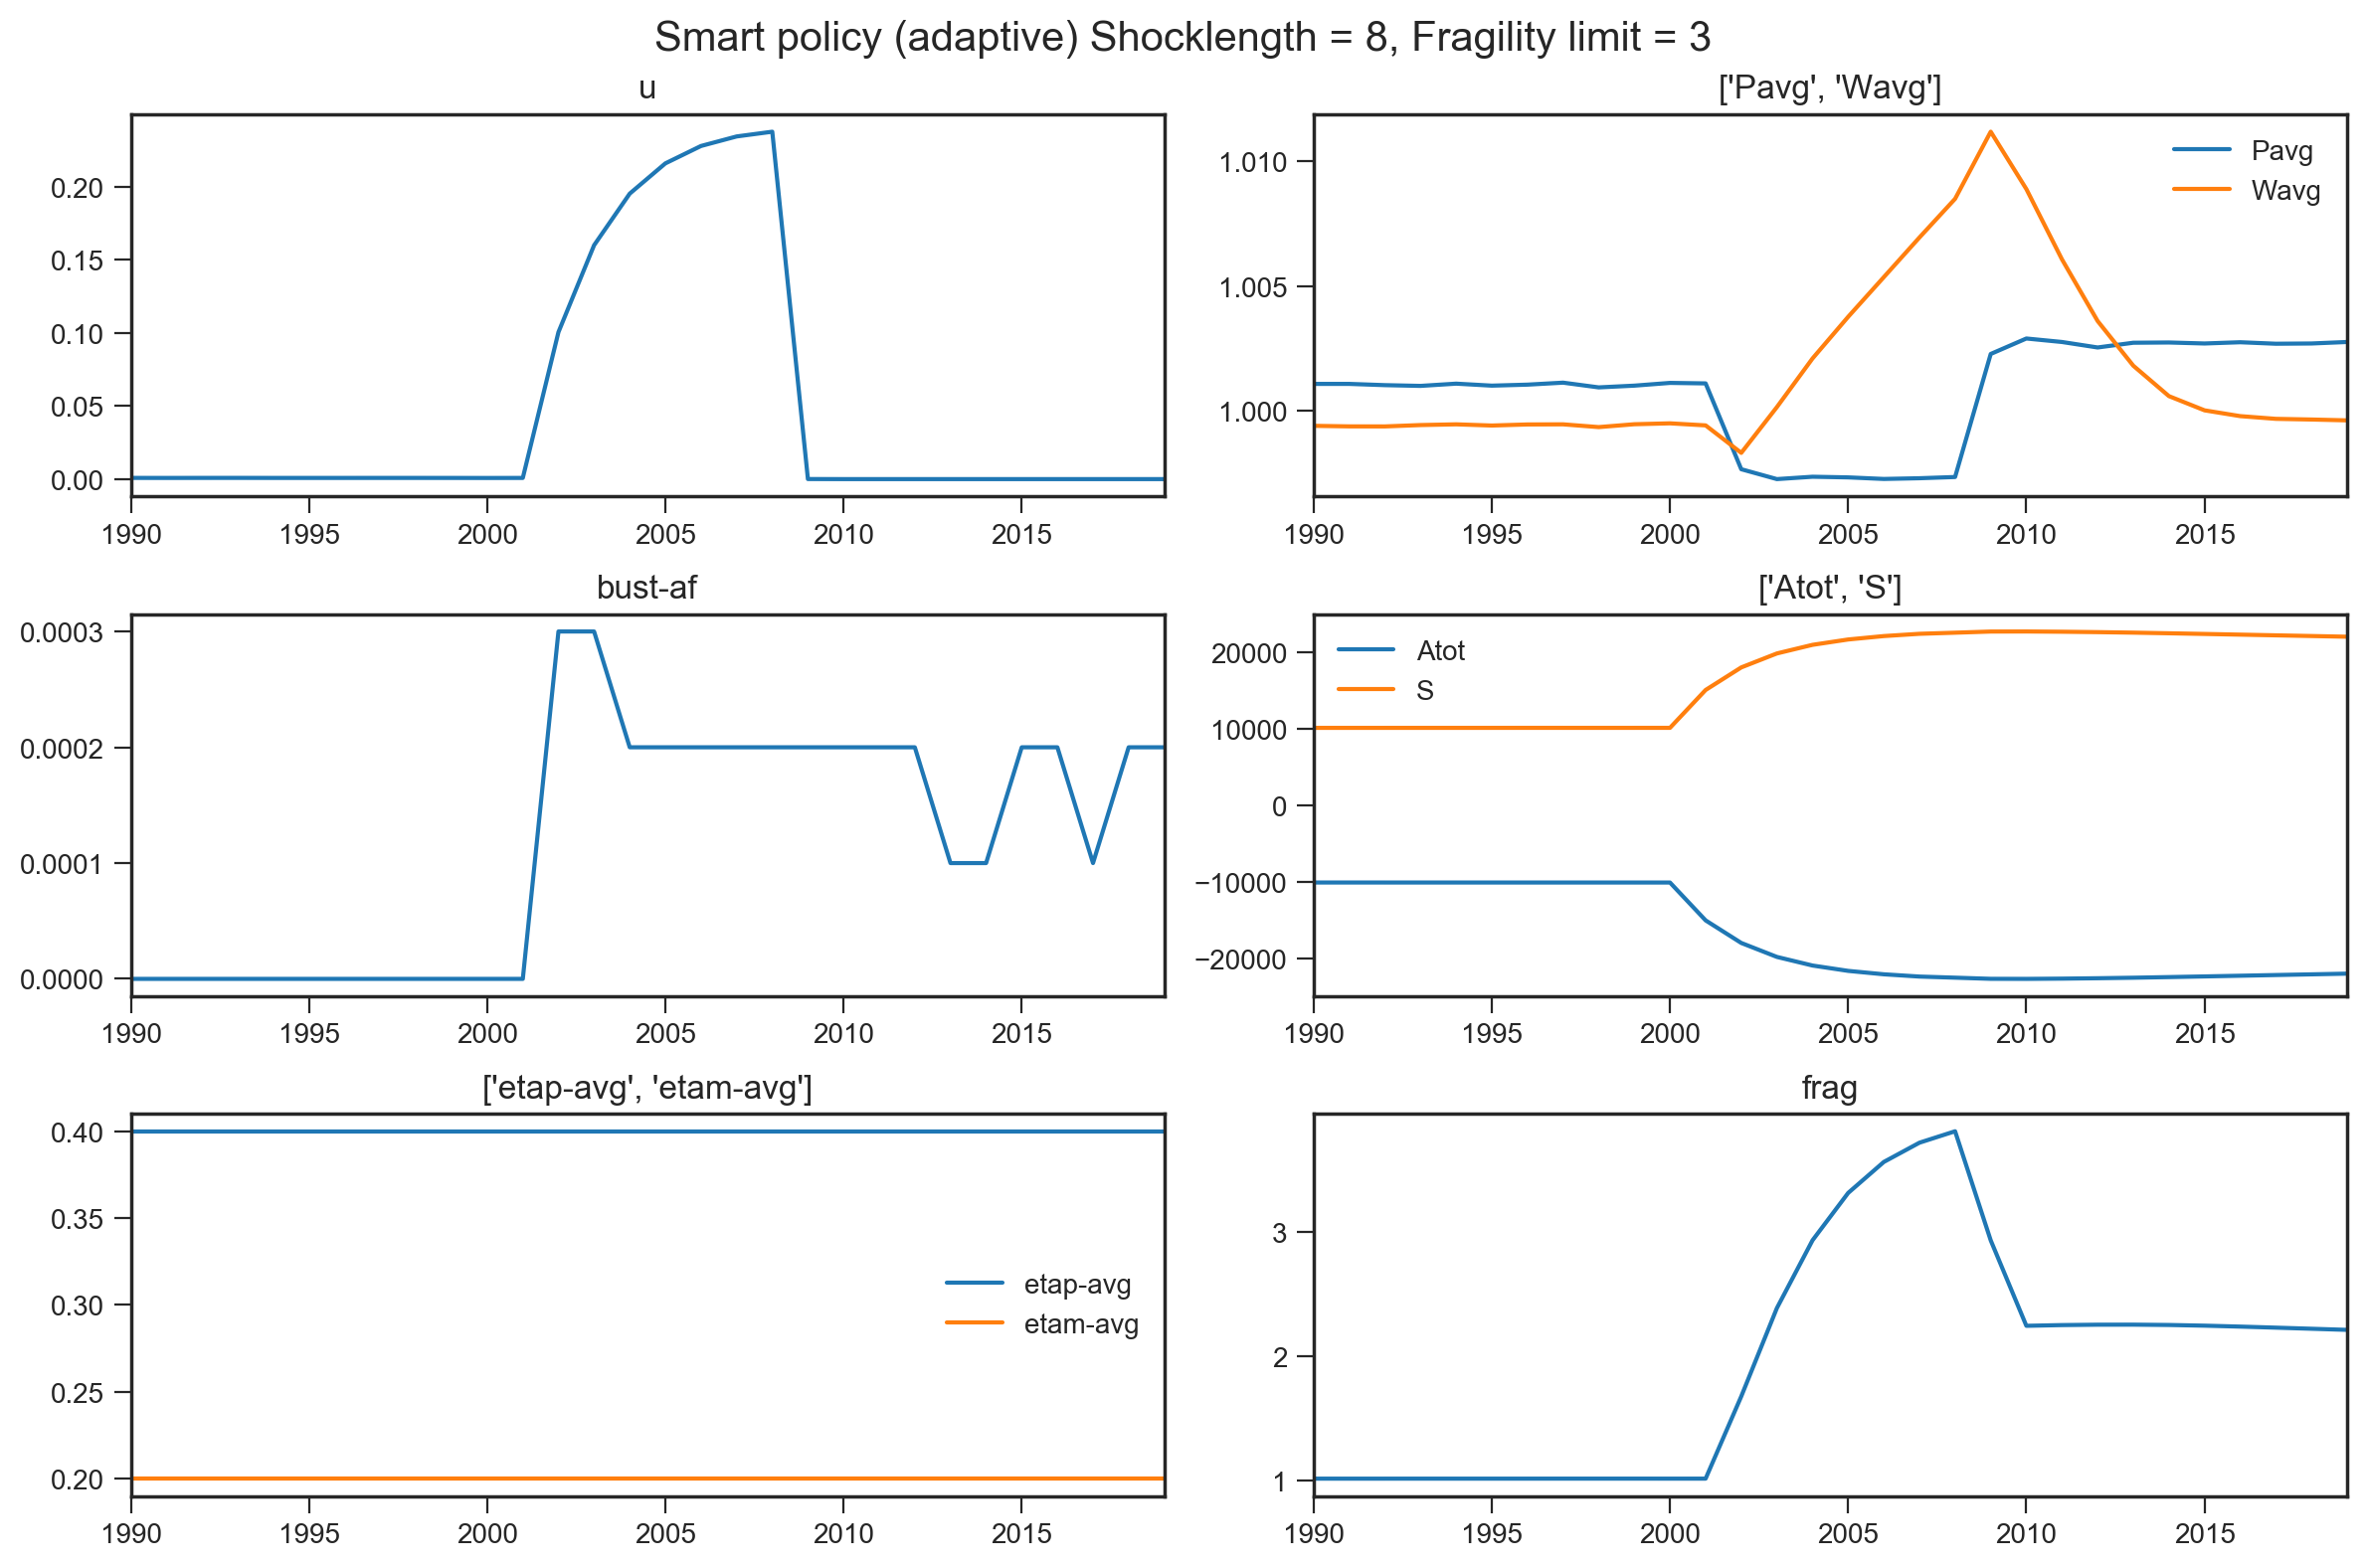

In [42]:
plt.clf()
p = t_plot(res, fd=1990, td=2020,title = 'Smart policy (adaptive) Shocklength = {}, Fragility limit = {}'.format(8,3))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)
print(f"Adaptive policy ran till = {res['true_end'].iloc[-1]}")

In [45]:
shockflag = 4
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','ptol', 'gpolicy', 'adapt']
param_values = [shockflag,  factor, 2008, 2000, 2007, 0.1, 1, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7
Adaptive policy ran till = 2010


<Figure size 432x288 with 0 Axes>

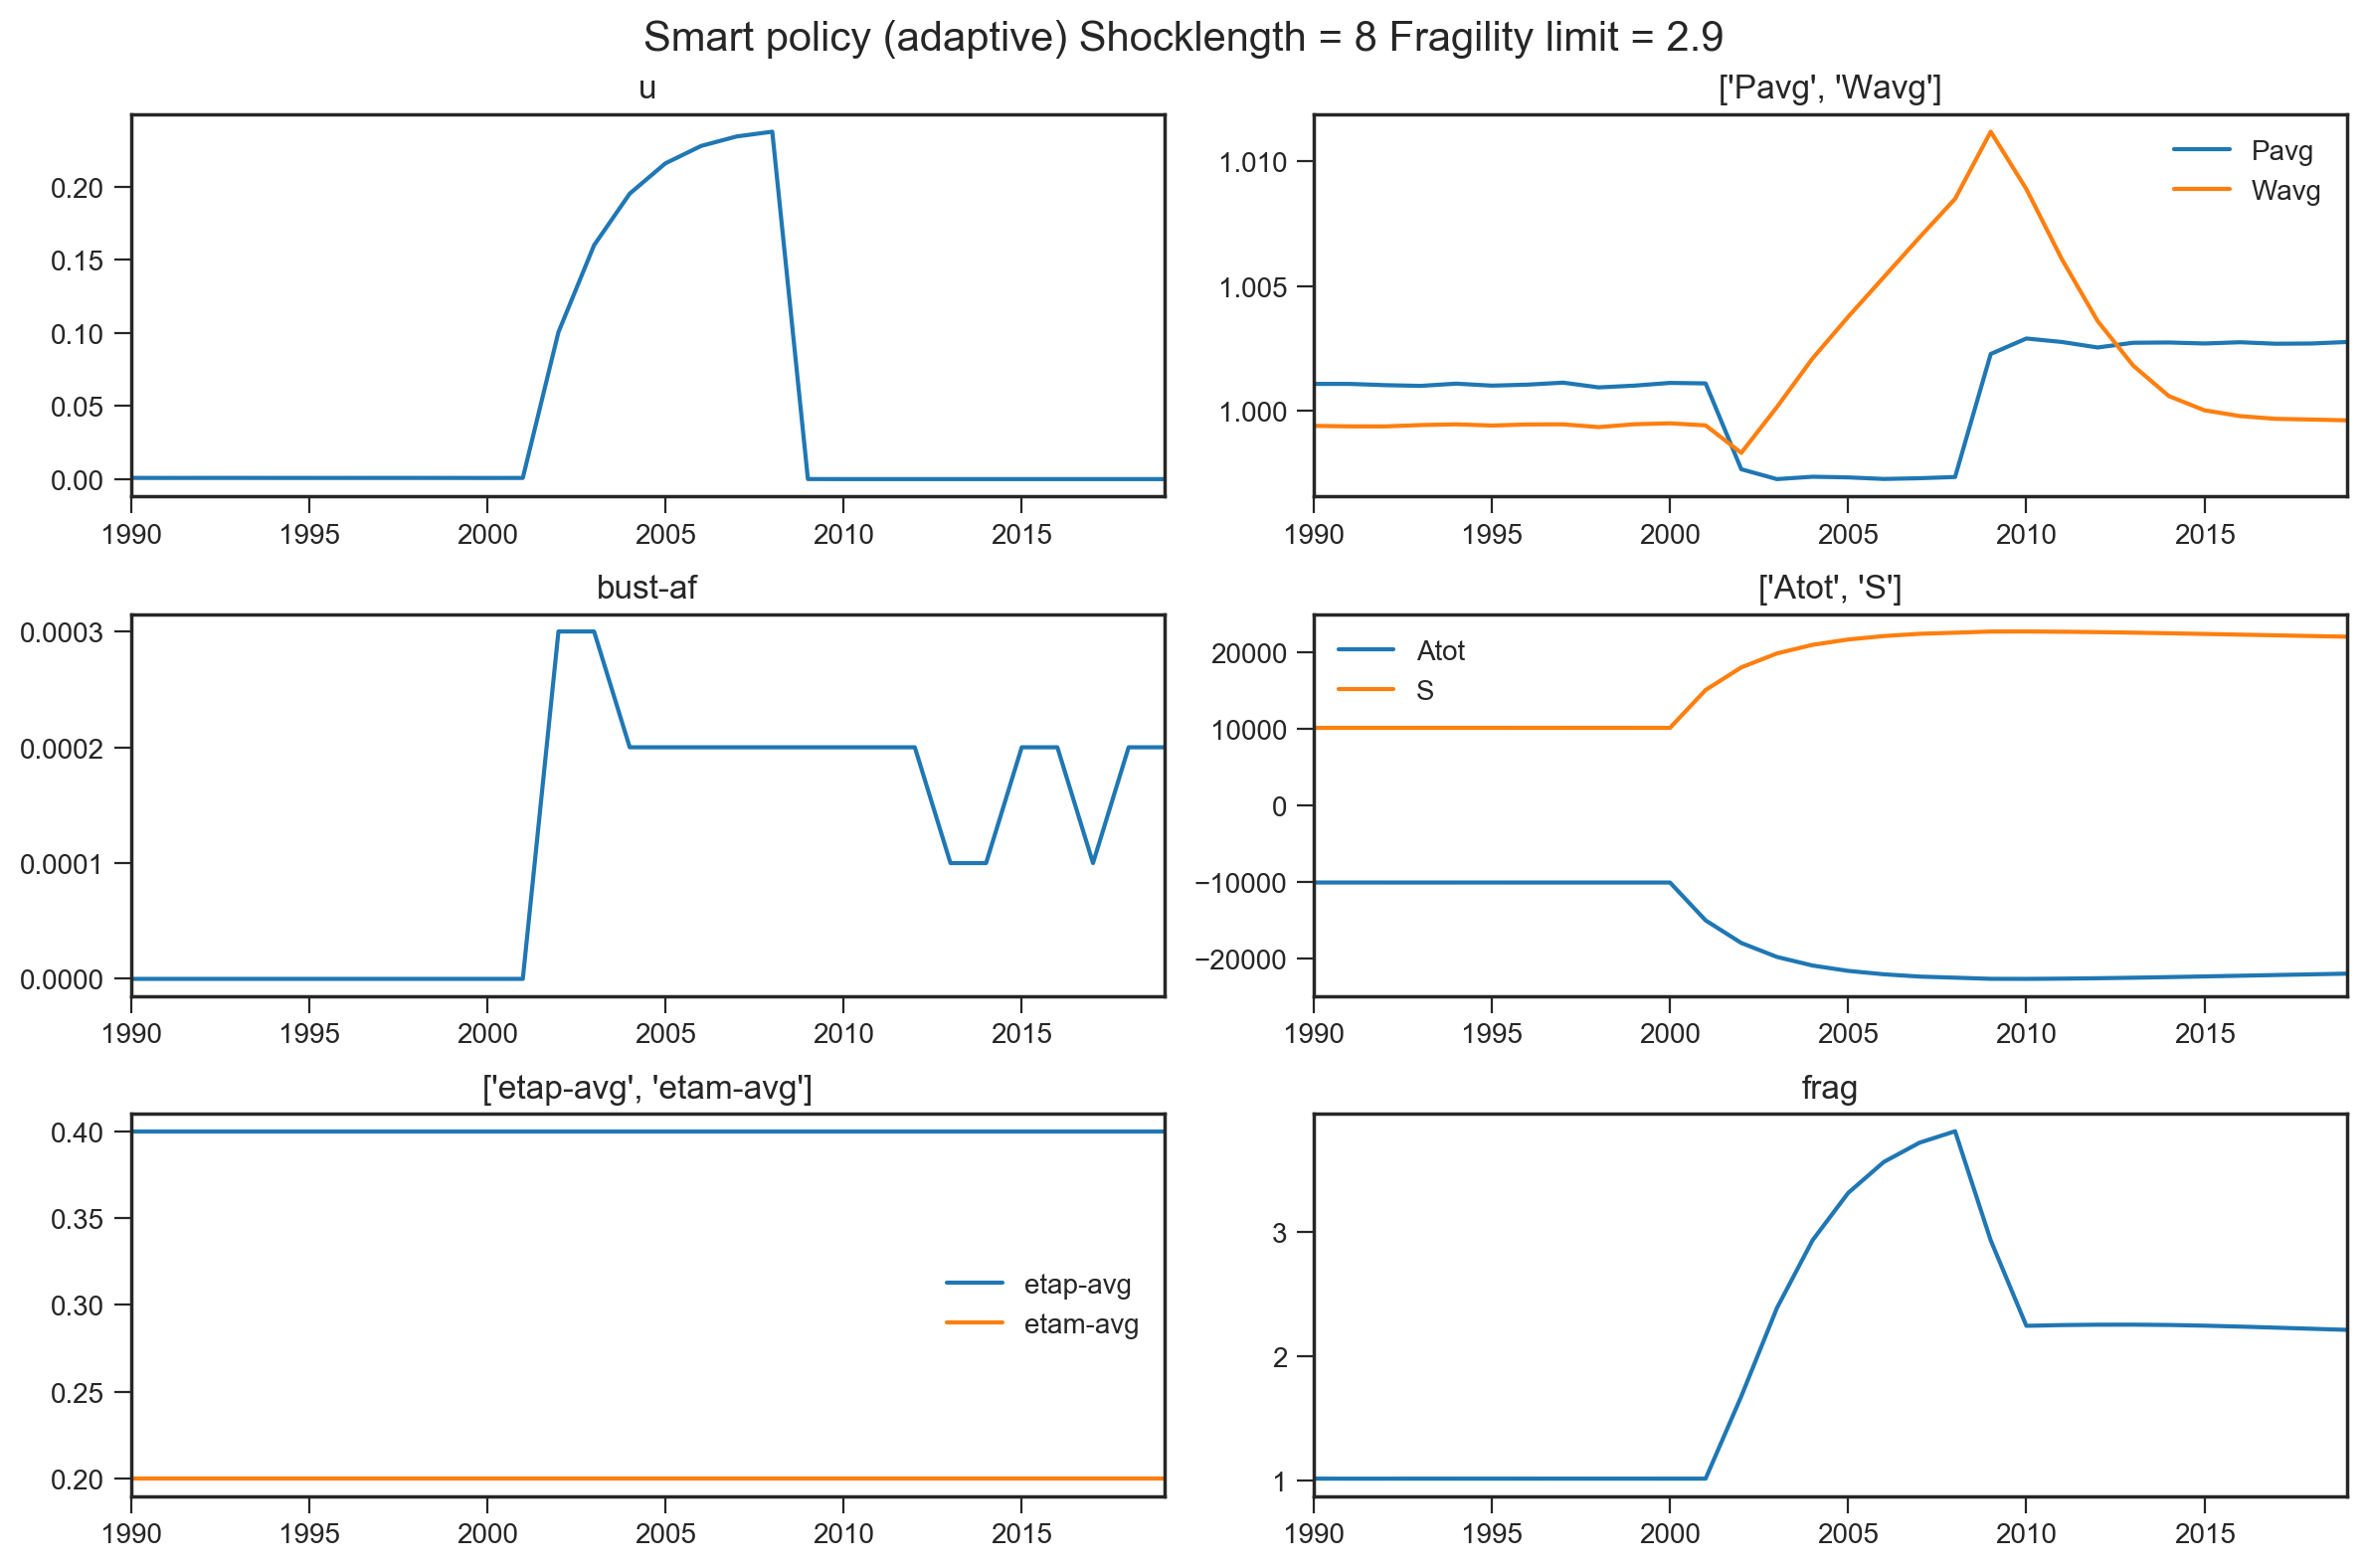

In [47]:
plt.clf()
p = t_plot(res, fd=1990, td=2020,title = 'Smart policy (adaptive) Shocklength = {} Fragility limit = {}'.format(8,3-0.1))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)
print(f"Adaptive policy ran till = {res['true_end'].iloc[-1]}")

In [48]:
shockflag = 4
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','ptol', 'gpolicy', 'adapt']
param_values = [shockflag,  factor, 2008, 2000, 2005, 0.5, 1, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7
Adaptive policy ran till = 2010


<Figure size 432x288 with 0 Axes>

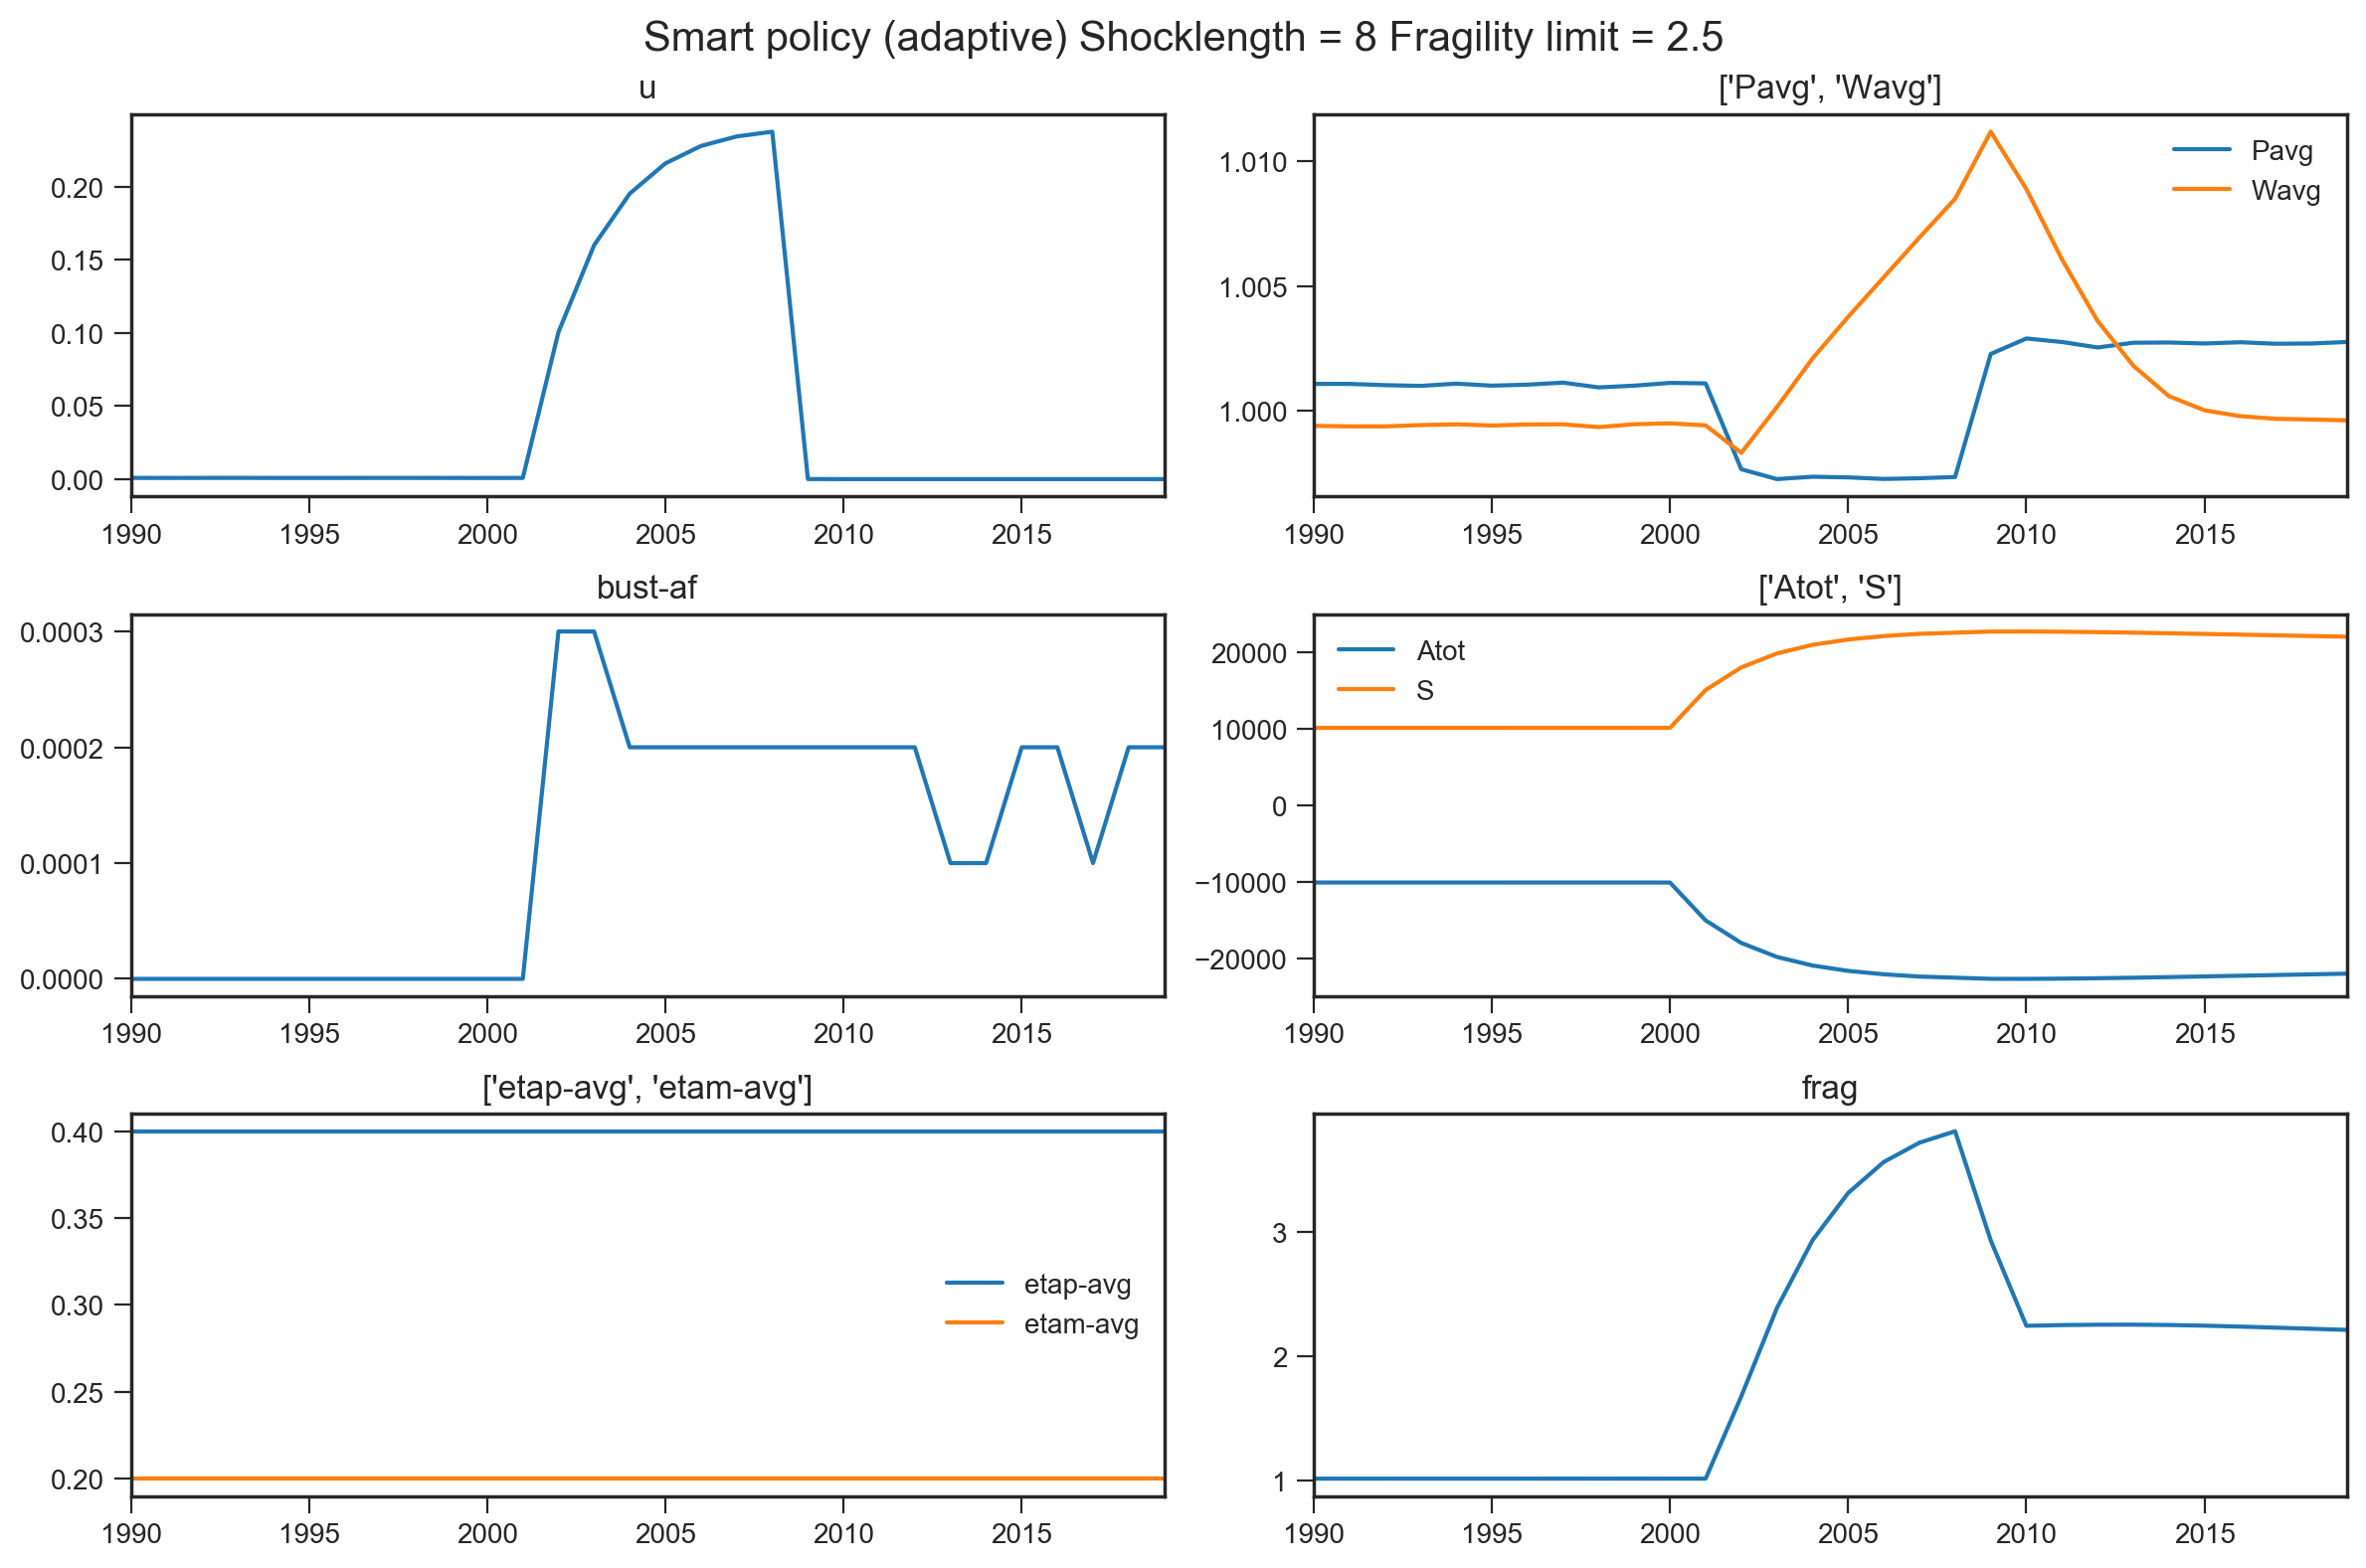

In [52]:
plt.clf()
p = t_plot(res, fd=1990, td=2020,title = 'Smart policy (adaptive) Shocklength = {} Fragility limit = {}'.format(8,3-0.5))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)
print(f"Adaptive policy ran till = {res['true_end'].iloc[-1]}")

## Helicopter Drop + Smart Policy 

In [55]:
shockflag = 4
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','ptol', 'gpolicy', 'adapt', 'helico']
param_values = [shockflag,  factor, 2008, 2000, 2008, 0.0, 1, 1, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7
Adaptive policy ran till = 2009


<Figure size 432x288 with 0 Axes>

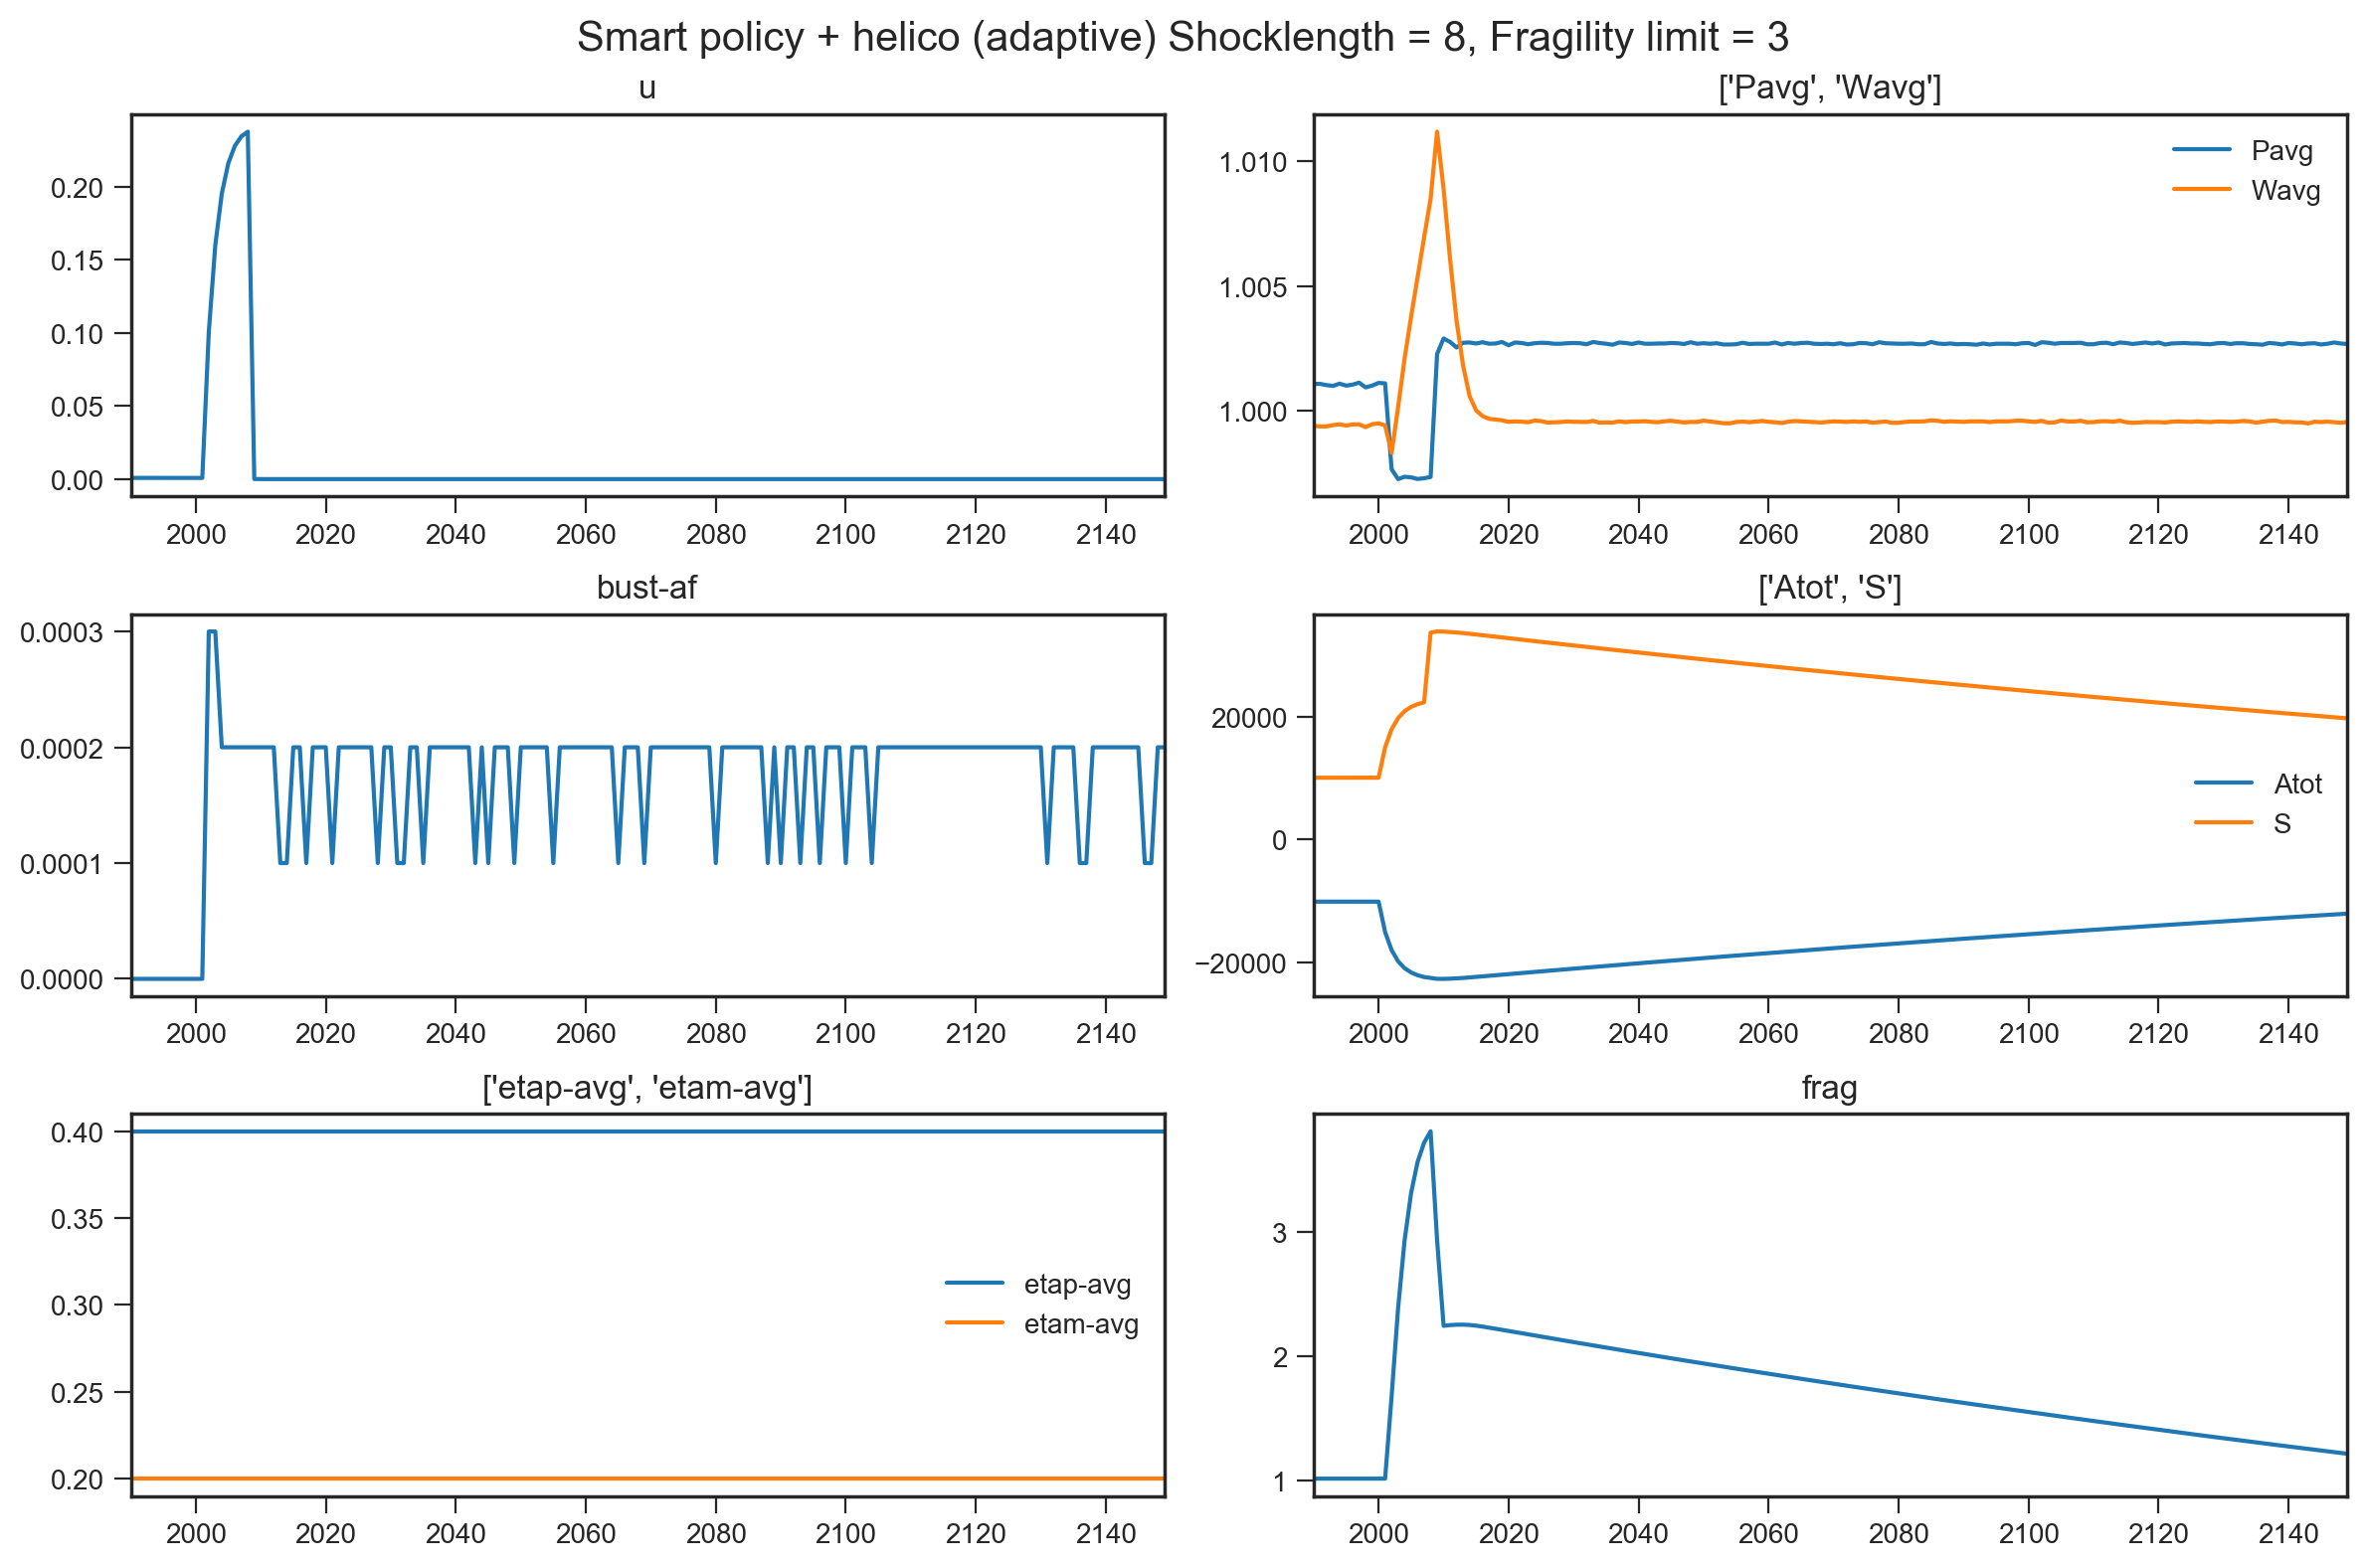

In [56]:
plt.clf()
p = t_plot(res, fd=1990, td=2150,title = 'Smart policy + helico (adaptive) Shocklength = {}, Fragility limit = {}'.format(8,3))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)
print(f"Adaptive policy ran till = {res['true_end'].iloc[-1]}")

In [57]:
shockflag = 4
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','ptol', 'gpolicy', 'adapt', 'helico']
param_values = [shockflag,  factor, 2008, 2000, 2008, 0.1, 1, 1, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7
Adaptive policy ran till = 2010


<Figure size 432x288 with 0 Axes>

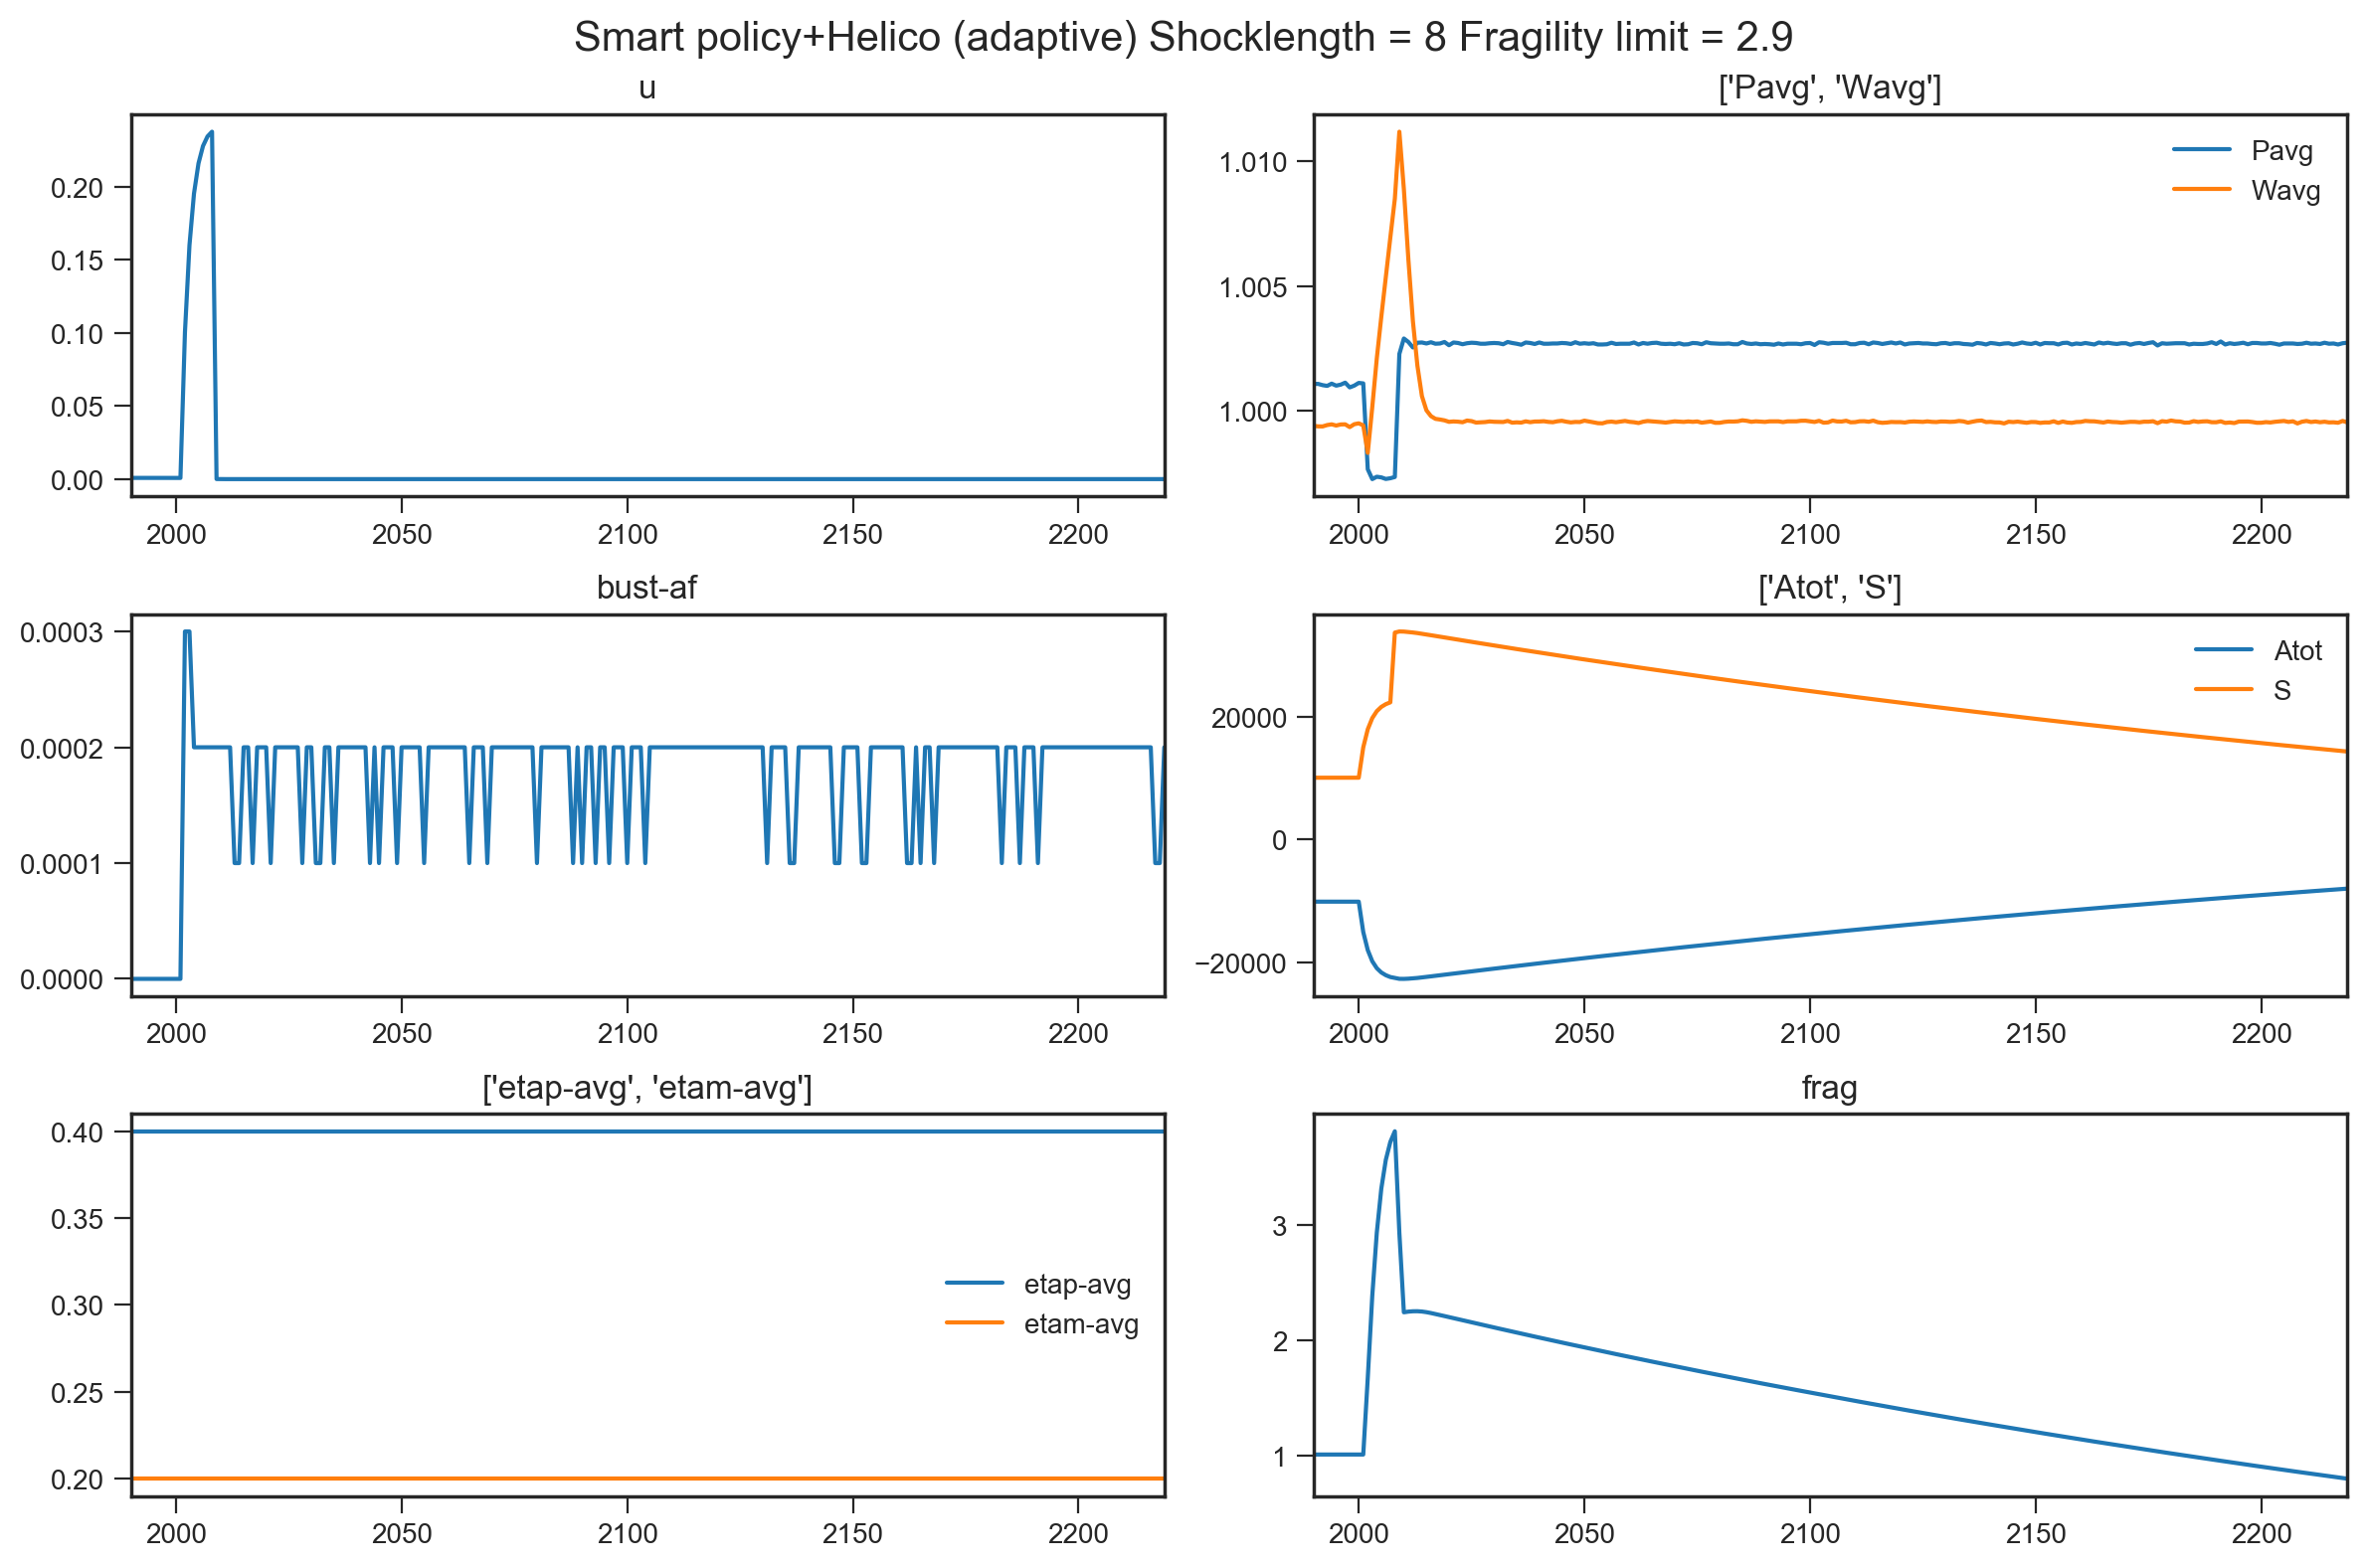

In [58]:
plt.clf()
p = t_plot(res, fd=1990, td=2220,title = 'Smart policy+Helico (adaptive) Shocklength = {} Fragility limit = {}'.format(8,3-0.1))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)
print(f"Adaptive policy ran till = {res['true_end'].iloc[-1]}")

In [61]:
shockflag = 4
param_names = ['shockflag','factor', 't_end', 'policy_start', 'policy_end','ptol', 'gpolicy', 'adapt', 'helico']
param_values = [shockflag,  factor, 2008, 2000, 2005, 0.5, 1, 1, 1]
out = run_program_default(param_names, param_values, './covid')
res = read_output([fnames[shockflag]], h_cols)[flagnames[shockflag]]

Single crisis. Length =   7
Adaptive policy ran till = 2010


<Figure size 432x288 with 0 Axes>

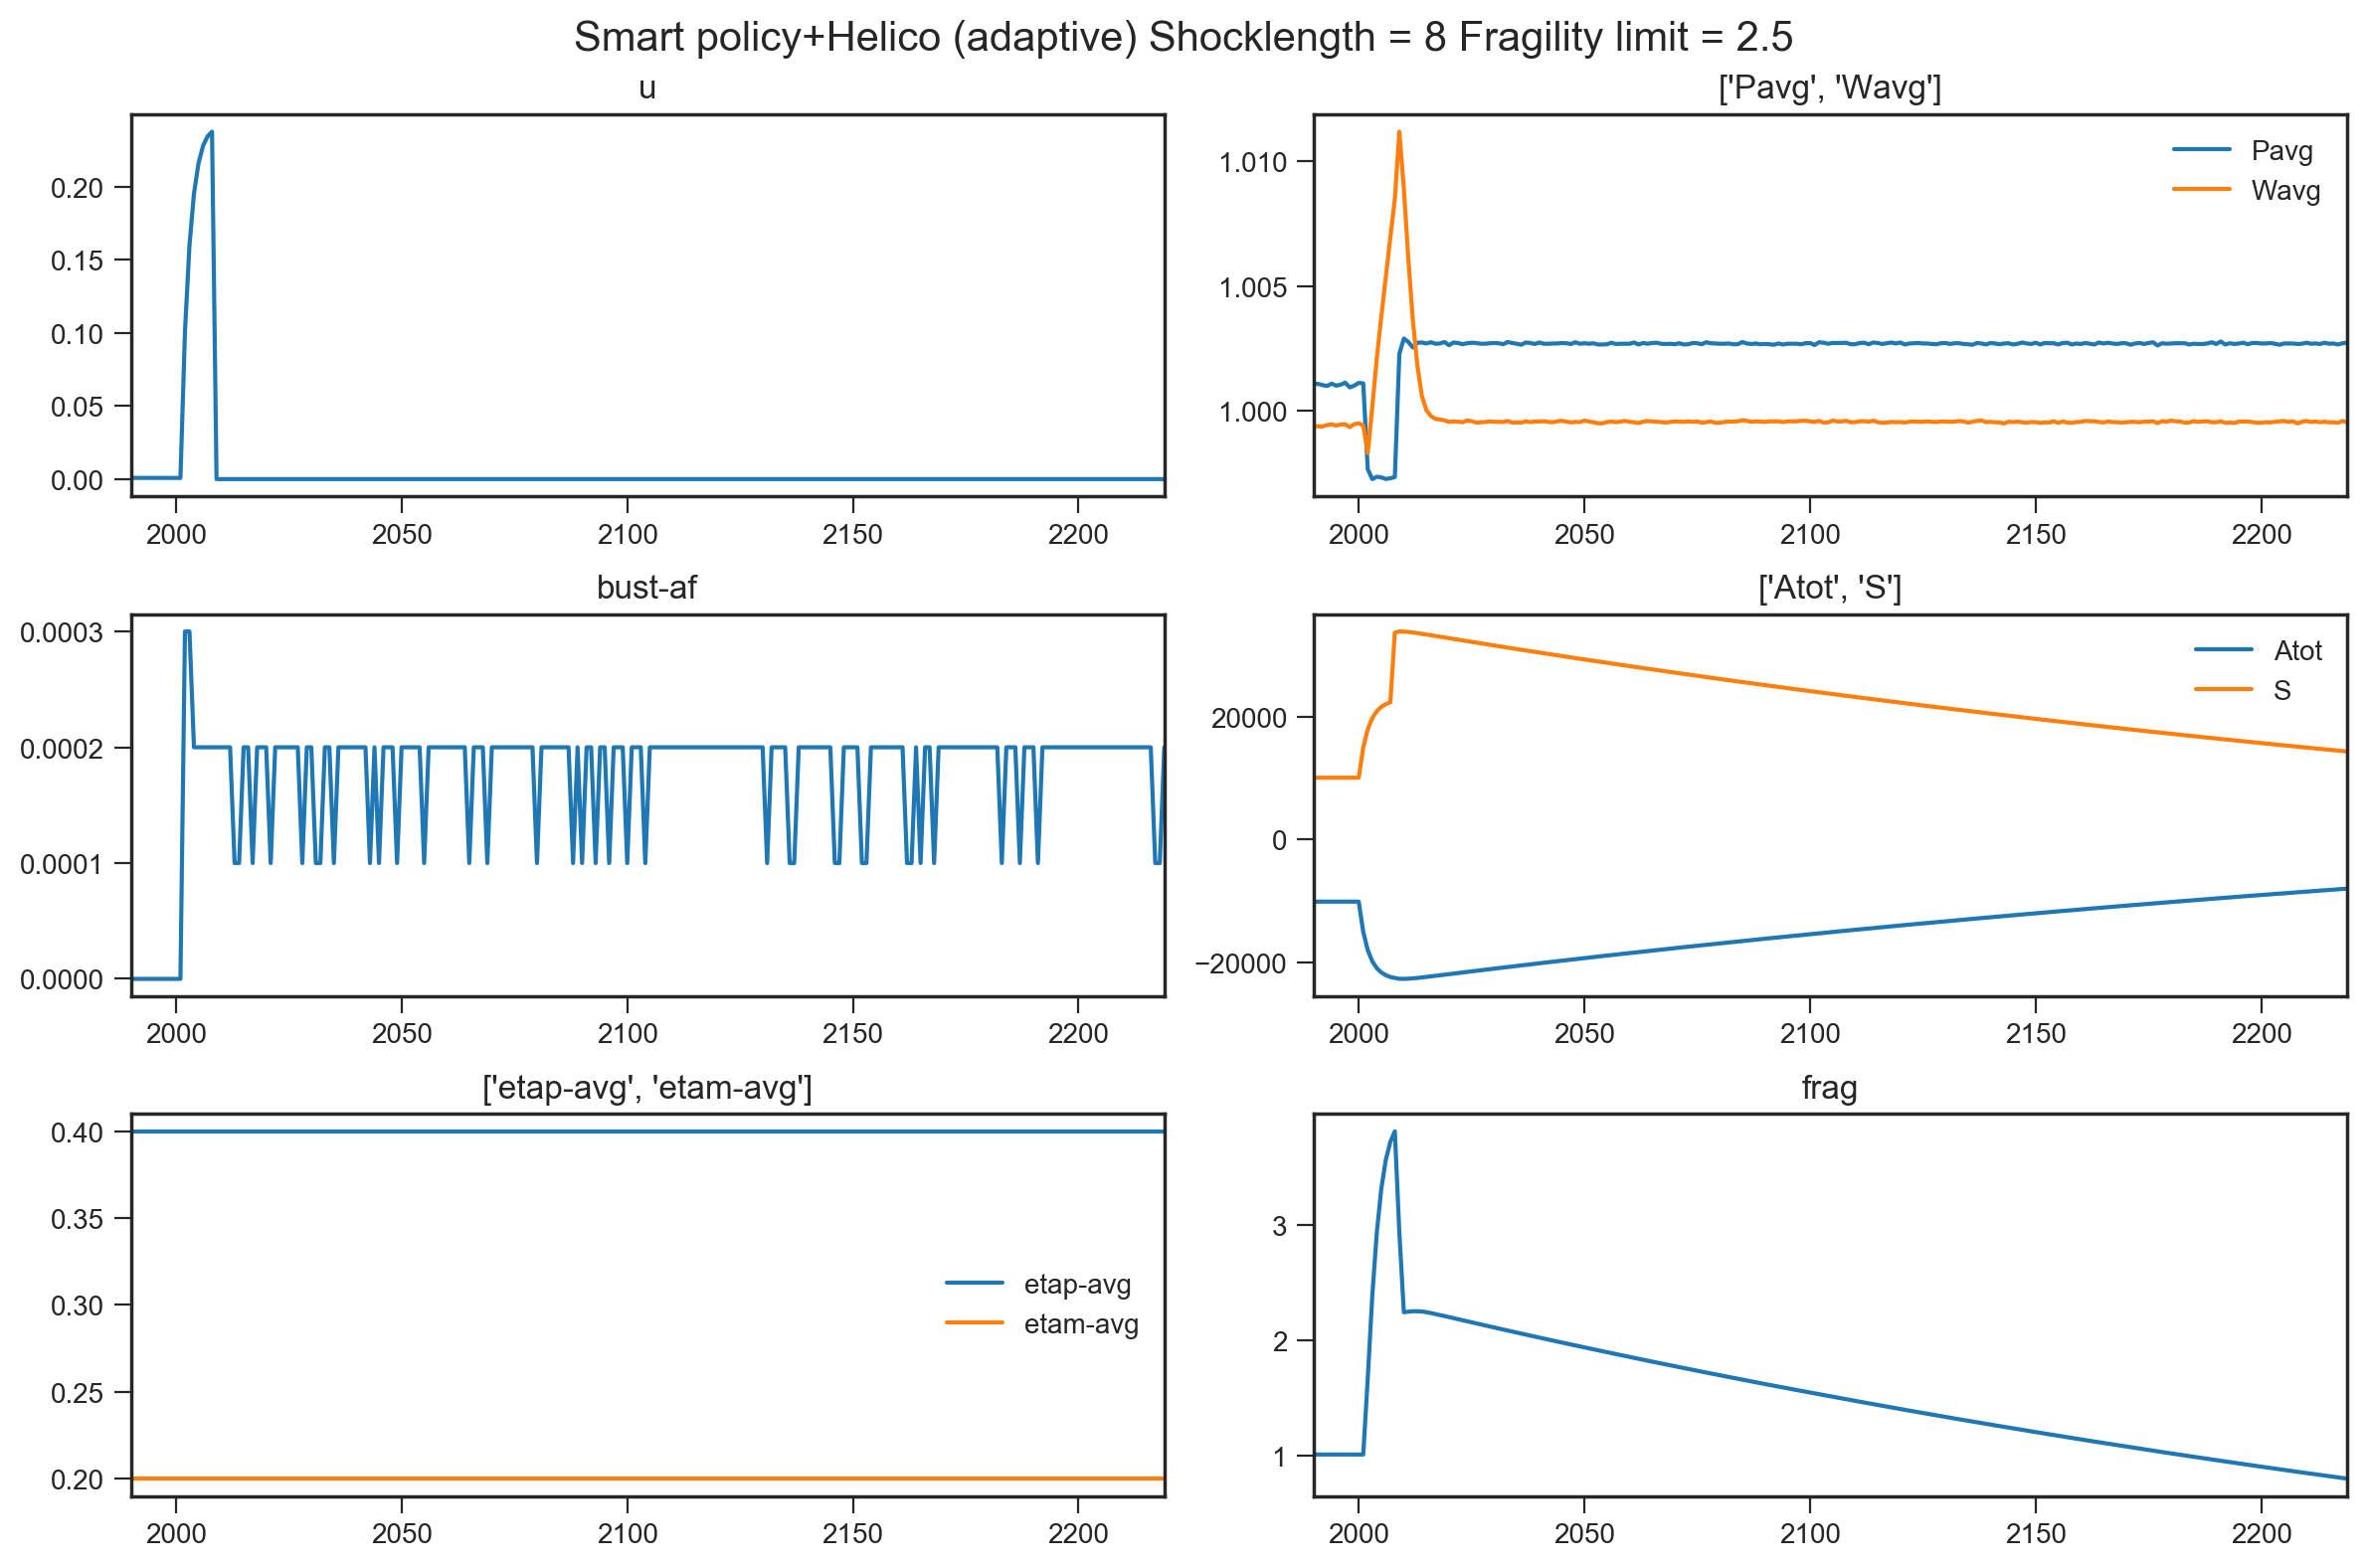

In [62]:
plt.clf()
p = t_plot(res, fd=1990, td=2220,title = 'Smart policy+Helico (adaptive) Shocklength = {} Fragility limit = {}'.format(8,3-0.5))
plt.tight_layout()
plt.subplots_adjust(top=0.92)
type_crisis(res)
print(f"Adaptive policy ran till = {res['true_end'].iloc[-1]}")